## 2.4: Optimizing Hyperparameters Tuning- CNN Model

## Table of Contents  
- [1. Load Libraries & Dataset](#1-load-libraries-datasets)  
- [2. Clean & Wrangle ](#2-clean-wrangle)  
- [3. Shaping Data for Modeling](#3-shape-data-for-modelling)  
- [4. Splitting Data](#4-splitting-data)  
- [5. Bayesian Hyperparameter Optimization](#5-bayesian-hyperparameter-optimization)  
- [6. Running CNN with Optimized Search Parameters](#6-running-cnn-with-optimized-search-parameters)  
- [7. Creating Confusion Matrix](#7-creating-confusion-matrix)

### 1. Load Libraries & Dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import time
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.model_selection import StratifiedKFold
from sklearn.utils.multiclass import type_of_target
import tensorflow as tf
from numpy import unique
from numpy import reshape
from tensorflow.keras.models import Sequential
from sklearn.model_selection import cross_val_score
from tensorflow.keras.layers import Input, Conv1D, Dense, Dropout, BatchNormalization, Flatten, MaxPooling1D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam, SGD, RMSprop, Adadelta, Adagrad, Adamax, Nadam, Ftrl
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from scikeras.wrappers import KerasClassifier  # Use scikeras for scikit-learn compatibility
from math import floor
from bayes_opt import BayesianOptimization
from tensorflow.keras.layers import LeakyReLU  # Use tensorflow.keras instead of keras
LeakyReLU = LeakyReLU(negative_slope=0.1)
import warnings

In [3]:
# Set option to ensure charts are displayed inline in the notebook
%matplotlib inline

In [5]:
# Set option to display max number of columns
pd.set_option('display.max_columns', None)

In [7]:
# Define directory path
path = r'C:\Users\Olufemi\Downloads\CareerFoundry Data Analyics\Machine Learning Specialization Course\Achievement 2\Data Sets'

In [9]:
# Import the cleaned weather dataset
climate = pd.read_csv(os.path.join(path, 'Unsupervised', 'Cleaned Datasets', 'weather_cleaned.csv'))

In [11]:
climate.head()

,DATE,MONTH,BASEL_cloud_cover,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,BASEL_temp_max,BELGRADE_cloud_cover,BELGRADE_humidity,BELGRADE_pressure,BELGRADE_global_radiation,BELGRADE_precipitation,BELGRADE_sunshine,BELGRADE_temp_mean,BELGRADE_temp_min,BELGRADE_temp_max,BUDAPEST_cloud_cover,BUDAPEST_humidity,BUDAPEST_pressure,BUDAPEST_global_radiation,BUDAPEST_precipitation,BUDAPEST_sunshine,BUDAPEST_temp_mean,BUDAPEST_temp_min,BUDAPEST_temp_max,DEBILT_cloud_cover,DEBILT_humidity,DEBILT_pressure,DEBILT_global_radiation,DEBILT_precipitation,DEBILT_sunshine,DEBILT_temp_mean,DEBILT_temp_min,DEBILT_temp_max,DUSSELDORF_cloud_cover,DUSSELDORF_humidity,DUSSELDORF_pressure,DUSSELDORF_global_radiation,DUSSELDORF_precipitation,DUSSELDORF_sunshine,DUSSELDORF_temp_mean,DUSSELDORF_temp_min,DUSSELDORF_temp_max,HEATHROW_cloud_cover,HEATHROW_humidity,HEATHROW_pressure,HEATHROW_global_radiation,HEATHROW_precipitation,HEATHROW_sunshine,HEATHROW_temp_mean,HEATHROW_temp_min,HEATHROW_temp_max,KASSEL_cloud_cover,KASSEL_humidity,KASSEL_pressure,KASSEL_global_radiation,KASSEL_precipitation,KASSEL_sunshine,KASSEL_temp_mean,KASSEL_temp_min,KASSEL_temp_max,LJUBLJANA_cloud_cover,LJUBLJANA_humidity,LJUBLJANA_pressure,LJUBLJANA_global_radiation,LJUBLJANA_precipitation,LJUBLJANA_sunshine,LJUBLJANA_temp_mean,LJUBLJANA_temp_min,LJUBLJANA_temp_max,MAASTRICHT_cloud_cover,MAASTRICHT_humidity,MAASTRICHT_pressure,MAASTRICHT_global_radiation,MAASTRICHT_precipitation,MAASTRICHT_sunshine,MAASTRICHT_temp_mean,MAASTRICHT_temp_min,MAASTRICHT_temp_max,MADRID_cloud_cover,MADRID_humidity,MADRID_pressure,MADRID_global_radiation,MADRID_precipitation,MADRID_sunshine,MADRID_temp_mean,MADRID_temp_min,MADRID_temp_max,MUNCHENB_cloud_cover,MUNCHENB_humidity,MUNCHENB_pressure,MUNCHENB_global_radiation,MUNCHENB_precipitation,MUNCHENB_sunshine,MUNCHENB_temp_mean,MUNCHENB_temp_min,MUNCHENB_temp_max,OSLO_cloud_cover,OSLO_humidity,OSLO_pressure,OSLO_global_radiation,OSLO_precipitation,OSLO_sunshine,OSLO_temp_mean,OSLO_temp_min,OSLO_temp_max,SONNBLICK_cloud_cover,SONNBLICK_humidity,SONNBLICK_pressure,SONNBLICK_global_radiation,SONNBLICK_precipitation,SONNBLICK_sunshine,SONNBLICK_temp_mean,SONNBLICK_temp_min,SONNBLICK_temp_max,STOCKHOLM_cloud_cover,STOCKHOLM_humidity,STOCKHOLM_pressure,STOCKHOLM_global_radiation,STOCKHOLM_precipitation,STOCKHOLM_sunshine,STOCKHOLM_temp_mean,STOCKHOLM_temp_min,STOCKHOLM_temp_max,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,19600101,1,7,0.85,1.018,0.32,0.09,0.7,6.5,0.8,10.9,1,0.81,1.0195,0.88,0.00,7.0,3.7,-0.9,7.9,4,0.67,1.017,0.44,0.01,2.3,2.4,-0.4,5.1,7,0.85,1.0032,0.07,0.25,0.0,9.3,7.4,11.0,8,0.83,1.0161,0.12,0.08,0.0,10.0,7.0,11.5,7,0.91,1.0010,0.13,0.22,0.0,10.6,9.4,8.3,8,0.82,1.0094,0.28,0.48,1.6,7.9,3.9,9.4,8,1.00,1.0173,0.20,0.00,0.0,-0.6,-1.9,0.5,7,0.83,1.0063,0.22,0.32,1.0,9.5,8.5,11.1,6,0.92,1.0260,0.53,0.0,1.4,7.6,4.4,10.8,5,0.67,1.018,0.20,0.10,0.0,6.9,1.1,10.4,8,0.98,0.9978,0.04,1.14,0.0,4.9,3.8,5.9,4,0.73,1.0304,0.48,0.01,2.3,-5.9,-8.5,-3.2,5,0.98,1.0114,0.05,0.32,0.0,4.2,2.2,4.9,5,0.88,1.0003,0.45,0.34,4.7,8.5,6.0,10.9
1,19600102,1,6,0.84,1.018,0.36,1.05,1.1,6.1,3.3,10.1,6,0.84,1.0172,0.25,0.00,0.0,2.9,2.2,4.4,4,0.67,1.017,0.18,0.31,0.0,2.3,1.4,3.1,8,0.90,1.0056,0.14,0.06,0.1,7.7,6.4,8.3,8,0.89,1.0161,0.18,0.66,0.5,8.2,7.4,11.0,7,0.98,1.0051,0.13,0.23,0.0,6.1,3.9,10.6,8,0.86,1.0086,0.12,0.27,0.0,7.7,6.8,9.1,6,0.94,1.0173,0.56,0.13,3.2,2.1,-1.3,5.5,8,0.92,1.0062,0.17,1.34,0.4,8.6,7.5,9.9,7,0.86,1.0254,0.46,0.0,0.9,9.8,7.4,12.2,6,0.72,1.018,0.61,0.30,5.1,6.2,4.2,10.2,8,0.62,1.0139,0.04,0.00,0.0,3.4,2.8,4.9,6,0.97,1.0292,0.21,0.61,0.0,-9.5,-10.5,-8.5,5,0.62,1.0114,0.05,0.06,0.0,4.0,3.0,5.0,7,0.91,1.0007,0.25,0.84,0.7,8.9,5.6,12.1
2,19600103,1,8,0.90,1.018,0.18,0.30,0.0,8.5,5.1,9.9,6,0.77,1.0179,0.67,0.00,3.5,3.1,-0.5,6.4,4,0.67,1.017,0.30,0

In [13]:
# Import the 'Pleasant weather' dataset
weather = pd.read_csv(os.path.join(path, 'Dataset-Answers-Weather_Prediction_Pleasant_Weather.csv'))

In [15]:
weather.head()

,DATE,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
0,19600101,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,19600102,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,19600103,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,19600104,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,19600105,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## 2. Data Cleaning & Wrangling

In [18]:
# Drop date from weather df
weather.drop(columns = 'DATE', inplace = True)

In [20]:
# Drop date and month from climate df
climate.drop(columns=['DATE', 'MONTH'], inplace=True)

In [24]:
climate.shape

(22950, 135)

In [26]:
weather.shape

(22950, 15)

## 3. Reshaping for Modeling

In [29]:
# Turn X and answers from df to arrays
X = np.array(climate)
y = np.array(weather)

In [31]:
X = X.reshape(-1,15,9)

In [35]:
X.shape

(22950, 15, 9)

In [37]:
# Use argmax to transform y
y =  np.argmax(y, axis = 1)
y

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [39]:
y.shape

(22950,)

In [41]:
# Check y layout

from sklearn.utils.multiclass import type_of_target
type_of_target(y)

'multiclass'

## 4. Splitting Data

In [44]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 42)

In [46]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(17212, 15, 9) (17212,)
(5738, 15, 9) (5738,)


## 5. Bayesian Hyperparameter Optimization

In [53]:
timesteps = len(X_train[0])
input_dim = len(X_train[0][0])
n_classes = 15 # Number of weather stations

# Make scorer accuracy
score_acc = make_scorer(accuracy_score)

In [59]:
# Create function

def bay_area(neurons, activation, kernel, optimizer, learning_rate, batch_size, epochs,
              layers1, layers2, normalization, dropout, dropout_rate): 
    optimizerL = ['SGD', 'Adam', 'RMSprop', 'Adadelta', 'Adagrad', 'Adamax', 'Nadam', 'Ftrl','SGD']
    #optimizerD= {'Adam':Adam(lr=learning_rate), 'SGD':SGD(lr=learning_rate),
                 #'RMSprop':RMSprop(lr=learning_rate), 'Adadelta':Adadelta(lr=learning_rate),
                 #'Adagrad':Adagrad(lr=learning_rate), 'Adamax':Adamax(lr=learning_rate),
                 #'Nadam':Nadam(lr=learning_rate), 'Ftrl':Ftrl(lr=learning_rate)}
    activationL = ['relu', 'sigmoid', 'softplus', 'softsign', 'tanh', 'selu',
                   'elu', 'exponential', LeakyReLU,'relu']
    
    neurons = round(neurons)
    kernel = round(kernel)
    activation = activationL[round(activation)]  #optimizerD[optimizerL[round(optimizer)]]
    optimizer = optimizerL[round(optimizer)]
    batch_size = round(batch_size)
    
    epochs = round(epochs)
    layers1 = round(layers1)
    layers2 = round(layers2)
    
    def cnn_model():
        model = Sequential()
        model.add(Conv1D(neurons, kernel_size=kernel,activation=activation, input_shape=(timesteps, input_dim)))
        #model.add(Conv1D(32, kernel_size=1,activation='relu', input_shape=(timesteps, input_dim)))
        
        if normalization > 0.5:
            model.add(BatchNormalization())
        for i in range(layers1):
            model.add(Dense(neurons, activation=activation)) #(neurons, activation=activation))
        if dropout > 0.5:
            model.add(Dropout(dropout_rate, seed=123))
        for i in range(layers2):
            model.add(Dense(neurons, activation=activation))
        model.add(MaxPooling1D())
        model.add(Flatten())
        model.add(Dense(n_classes, activation='softmax')) #sigmoid softmax
        #model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy']) #categorical_crossentropy
        model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy']) #categorical_crossentropy
        return model
    es = EarlyStopping(monitor='accuracy', mode='max', verbose=2, patience=20)
    nn = KerasClassifier(build_fn=cnn_model, epochs=epochs, batch_size=batch_size, verbose=2)
    kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=123)
    score = cross_val_score(nn, X_train, y_train, scoring=score_acc, cv=kfold, params={'callbacks':[es]}).mean()
    return score

In [61]:
start = time.time()
params ={
    'neurons': (10, 100),
    'kernel': (1, 3),
    'activation':(0, 9), 
    'optimizer':(0,7),
    'learning_rate':(0.01, 1),
    'batch_size': (200, 1000), 
    'epochs':(20, 50),
    'layers1':(1,3),
    'layers2':(1,3),
    'normalization':(0,1),
    'dropout':(0,1),
    'dropout_rate':(0,0.3)
}
# Run Bayesian Optimization
nn_opt = BayesianOptimization(bay_area, params, random_state=42)
nn_opt.maximize(init_points=15, n_iter=4) 
print('Search took %s minutes' % ((time.time() - start)/60))

|   iter    |  target   |  neurons  |  kernel   | activa... | optimizer | learni... | batch_... |  epochs   |  layers1  |  layers2  | normal... |  dropout  | dropou... |
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------


C:\Users\Olufemi\anaconda3\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\Olufemi\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/22
43/43 - 2s - 57ms/step - accuracy: 0.6435 - loss: nan
Epoch 2/22
43/43 - 0s - 11ms/step - accuracy: 0.6440 - loss: nan
Epoch 3/22
43/43 - 0s - 11ms/step - accuracy: 0.6440 - loss: nan
Epoch 4/22
43/43 - 0s - 10ms/step - accuracy: 0.6440 - loss: nan
Epoch 5/22
43/43 - 1s - 17ms/step - accuracy: 0.6440 - loss: nan
Epoch 6/22
43/43 - 1s - 12ms/step - accuracy: 0.6440 - loss: nan
Epoch 7/22
43/43 - 0s - 10ms/step - accuracy: 0.6440 - loss: nan
Epoch 8/22
43/43 - 0s - 10ms/step - accuracy: 0.6440 - loss: nan
Epoch 9/22
43/43 - 0s - 11ms/step - accuracy: 0.6440 - loss: nan
Epoch 10/22
43/43 - 0s - 10ms/step - accuracy: 0.6440 - loss: nan
Epoch 11/22
43/43 - 0s - 10ms/step - accuracy: 0.6440 - loss: nan
Epoch 12/22
43/43 - 0s - 11ms/step - accuracy: 0.6440 - loss: nan
Epoch 13/22
43/43 - 1s - 13ms/step - accuracy: 0.6440 - loss: nan
Epoch 14/22
43/43 - 1s - 12ms/step - accuracy: 0.6440 - loss: nan
Epoch 15/22
43/43 - 0s - 11ms/step - accuracy: 0.6440 - loss: nan
Epoch 16/22
43/43 -

C:\Users\Olufemi\anaconda3\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\Olufemi\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


43/43 - 2s - 45ms/step - accuracy: 0.6438 - loss: nan
Epoch 2/22
43/43 - 1s - 17ms/step - accuracy: 0.6440 - loss: nan
Epoch 3/22
43/43 - 1s - 14ms/step - accuracy: 0.6440 - loss: nan
Epoch 4/22
43/43 - 1s - 12ms/step - accuracy: 0.6440 - loss: nan
Epoch 5/22
43/43 - 0s - 11ms/step - accuracy: 0.6440 - loss: nan
Epoch 6/22
43/43 - 1s - 12ms/step - accuracy: 0.6440 - loss: nan
Epoch 7/22
43/43 - 0s - 10ms/step - accuracy: 0.6440 - loss: nan
Epoch 8/22
43/43 - 0s - 11ms/step - accuracy: 0.6440 - loss: nan
Epoch 9/22
43/43 - 1s - 13ms/step - accuracy: 0.6440 - loss: nan
Epoch 10/22
43/43 - 1s - 12ms/step - accuracy: 0.6440 - loss: nan
Epoch 11/22
43/43 - 0s - 11ms/step - accuracy: 0.6440 - loss: nan
Epoch 12/22
43/43 - 0s - 11ms/step - accuracy: 0.6440 - loss: nan
Epoch 13/22
43/43 - 1s - 13ms/step - accuracy: 0.6440 - loss: nan
Epoch 14/22
43/43 - 0s - 11ms/step - accuracy: 0.6440 - loss: nan
Epoch 15/22
43/43 - 1s - 15ms/step - accuracy: 0.6440 - loss: nan
Epoch 16/22
43/43 - 1s - 12ms/

C:\Users\Olufemi\anaconda3\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\Olufemi\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


43/43 - 2s - 38ms/step - accuracy: 0.6439 - loss: nan
Epoch 2/22
43/43 - 0s - 11ms/step - accuracy: 0.6439 - loss: nan
Epoch 3/22
43/43 - 1s - 12ms/step - accuracy: 0.6439 - loss: nan
Epoch 4/22
43/43 - 1s - 13ms/step - accuracy: 0.6439 - loss: nan
Epoch 5/22
43/43 - 0s - 10ms/step - accuracy: 0.6439 - loss: nan
Epoch 6/22
43/43 - 1s - 12ms/step - accuracy: 0.6439 - loss: nan
Epoch 7/22
43/43 - 1s - 12ms/step - accuracy: 0.6439 - loss: nan
Epoch 8/22
43/43 - 1s - 13ms/step - accuracy: 0.6439 - loss: nan
Epoch 9/22
43/43 - 1s - 13ms/step - accuracy: 0.6439 - loss: nan
Epoch 10/22
43/43 - 1s - 12ms/step - accuracy: 0.6439 - loss: nan
Epoch 11/22
43/43 - 1s - 15ms/step - accuracy: 0.6439 - loss: nan
Epoch 12/22
43/43 - 1s - 13ms/step - accuracy: 0.6439 - loss: nan
Epoch 13/22
43/43 - 1s - 13ms/step - accuracy: 0.6439 - loss: nan
Epoch 14/22
43/43 - 1s - 16ms/step - accuracy: 0.6439 - loss: nan
Epoch 15/22
43/43 - 1s - 13ms/step - accuracy: 0.6439 - loss: nan
Epoch 16/22
43/43 - 1s - 13ms/

C:\Users\Olufemi\anaconda3\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\Olufemi\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


43/43 - 2s - 38ms/step - accuracy: 0.6296 - loss: nan
Epoch 2/22
43/43 - 1s - 12ms/step - accuracy: 0.6440 - loss: nan
Epoch 3/22
43/43 - 0s - 12ms/step - accuracy: 0.6440 - loss: nan
Epoch 4/22
43/43 - 0s - 11ms/step - accuracy: 0.6440 - loss: nan
Epoch 5/22
43/43 - 1s - 12ms/step - accuracy: 0.6440 - loss: nan
Epoch 6/22
43/43 - 0s - 12ms/step - accuracy: 0.6440 - loss: nan
Epoch 7/22
43/43 - 0s - 12ms/step - accuracy: 0.6440 - loss: nan
Epoch 8/22
43/43 - 1s - 12ms/step - accuracy: 0.6440 - loss: nan
Epoch 9/22
43/43 - 1s - 14ms/step - accuracy: 0.6440 - loss: nan
Epoch 10/22
43/43 - 1s - 16ms/step - accuracy: 0.6440 - loss: nan
Epoch 11/22
43/43 - 1s - 18ms/step - accuracy: 0.6440 - loss: nan
Epoch 12/22
43/43 - 1s - 18ms/step - accuracy: 0.6440 - loss: nan
Epoch 13/22
43/43 - 1s - 16ms/step - accuracy: 0.6440 - loss: nan
Epoch 14/22
43/43 - 1s - 17ms/step - accuracy: 0.6440 - loss: nan
Epoch 15/22
43/43 - 1s - 19ms/step - accuracy: 0.6440 - loss: nan
Epoch 16/22
43/43 - 1s - 16ms/

C:\Users\Olufemi\anaconda3\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\Olufemi\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


43/43 - 3s - 59ms/step - accuracy: 0.6439 - loss: nan
Epoch 2/22
43/43 - 0s - 11ms/step - accuracy: 0.6439 - loss: nan
Epoch 3/22
43/43 - 0s - 11ms/step - accuracy: 0.6439 - loss: nan
Epoch 4/22
43/43 - 0s - 11ms/step - accuracy: 0.6439 - loss: nan
Epoch 5/22
43/43 - 0s - 11ms/step - accuracy: 0.6439 - loss: nan
Epoch 6/22
43/43 - 1s - 12ms/step - accuracy: 0.6439 - loss: nan
Epoch 7/22
43/43 - 0s - 11ms/step - accuracy: 0.6439 - loss: nan
Epoch 8/22
43/43 - 1s - 13ms/step - accuracy: 0.6439 - loss: nan
Epoch 9/22
43/43 - 0s - 11ms/step - accuracy: 0.6439 - loss: nan
Epoch 10/22
43/43 - 1s - 13ms/step - accuracy: 0.6439 - loss: nan
Epoch 11/22
43/43 - 0s - 11ms/step - accuracy: 0.6439 - loss: nan
Epoch 12/22
43/43 - 0s - 11ms/step - accuracy: 0.6439 - loss: nan
Epoch 13/22
43/43 - 0s - 11ms/step - accuracy: 0.6439 - loss: nan
Epoch 14/22
43/43 - 0s - 11ms/step - accuracy: 0.6439 - loss: nan
Epoch 15/22
43/43 - 0s - 11ms/step - accuracy: 0.6439 - loss: nan
Epoch 16/22
43/43 - 0s - 11ms/

C:\Users\Olufemi\anaconda3\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\Olufemi\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/33
23/23 - 2s - 107ms/step - accuracy: 0.6110 - loss: 1.2855
Epoch 2/33
23/23 - 1s - 44ms/step - accuracy: 0.6498 - loss: 1.0320
Epoch 3/33
23/23 - 1s - 43ms/step - accuracy: 0.6704 - loss: 0.9491
Epoch 4/33
23/23 - 1s - 43ms/step - accuracy: 0.6927 - loss: 0.8806
Epoch 5/33
23/23 - 1s - 43ms/step - accuracy: 0.7178 - loss: 0.8218
Epoch 6/33
23/23 - 1s - 43ms/step - accuracy: 0.7352 - loss: 0.7687
Epoch 7/33
23/23 - 1s - 48ms/step - accuracy: 0.7434 - loss: 0.7408
Epoch 8/33
23/23 - 1s - 42ms/step - accuracy: 0.7460 - loss: 0.7316
Epoch 9/33
23/23 - 1s - 43ms/step - accuracy: 0.7531 - loss: 0.7075
Epoch 10/33
23/23 - 1s - 44ms/step - accuracy: 0.7651 - loss: 0.6715
Epoch 11/33
23/23 - 1s - 47ms/step - accuracy: 0.7726 - loss: 0.6521
Epoch 12/33
23/23 - 1s - 48ms/step - accuracy: 0.7730 - loss: 0.6420
Epoch 13/33
23/23 - 1s - 50ms/step - accuracy: 0.7786 - loss: 0.6237
Epoch 14/33
23/23 - 1s - 43ms/step - accuracy: 0.7835 - loss: 0.6092
Epoch 15/33
23/23 - 1s - 50ms/step - accur

C:\Users\Olufemi\anaconda3\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\Olufemi\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


23/23 - 3s - 109ms/step - accuracy: 0.6100 - loss: 1.2722
Epoch 2/33
23/23 - 1s - 43ms/step - accuracy: 0.6372 - loss: 1.0270
Epoch 3/33
23/23 - 1s - 43ms/step - accuracy: 0.6820 - loss: 0.9111
Epoch 4/33
23/23 - 1s - 43ms/step - accuracy: 0.7070 - loss: 0.8460
Epoch 5/33
23/23 - 1s - 44ms/step - accuracy: 0.7228 - loss: 0.8035
Epoch 6/33
23/23 - 1s - 45ms/step - accuracy: 0.7380 - loss: 0.7618
Epoch 7/33
23/23 - 1s - 43ms/step - accuracy: 0.7542 - loss: 0.7258
Epoch 8/33
23/23 - 1s - 60ms/step - accuracy: 0.7592 - loss: 0.7028
Epoch 9/33
23/23 - 1s - 58ms/step - accuracy: 0.7677 - loss: 0.6765
Epoch 10/33
23/23 - 2s - 73ms/step - accuracy: 0.7742 - loss: 0.6545
Epoch 11/33
23/23 - 1s - 53ms/step - accuracy: 0.7790 - loss: 0.6405
Epoch 12/33
23/23 - 1s - 47ms/step - accuracy: 0.7782 - loss: 0.6368
Epoch 13/33
23/23 - 1s - 48ms/step - accuracy: 0.7884 - loss: 0.6115
Epoch 14/33
23/23 - 1s - 49ms/step - accuracy: 0.7936 - loss: 0.5936
Epoch 15/33
23/23 - 1s - 47ms/step - accuracy: 0.7976

C:\Users\Olufemi\anaconda3\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\Olufemi\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


23/23 - 3s - 125ms/step - accuracy: 0.6057 - loss: 1.3806
Epoch 2/33
23/23 - 1s - 44ms/step - accuracy: 0.6403 - loss: 1.0424
Epoch 3/33
23/23 - 1s - 54ms/step - accuracy: 0.6606 - loss: 0.9761
Epoch 4/33
23/23 - 1s - 42ms/step - accuracy: 0.6860 - loss: 0.9040
Epoch 5/33
23/23 - 1s - 42ms/step - accuracy: 0.7083 - loss: 0.8377
Epoch 6/33
23/23 - 1s - 41ms/step - accuracy: 0.7331 - loss: 0.7808
Epoch 7/33
23/23 - 1s - 43ms/step - accuracy: 0.7445 - loss: 0.7414
Epoch 8/33
23/23 - 1s - 45ms/step - accuracy: 0.7553 - loss: 0.7140
Epoch 9/33
23/23 - 1s - 44ms/step - accuracy: 0.7635 - loss: 0.6818
Epoch 10/33
23/23 - 1s - 46ms/step - accuracy: 0.7648 - loss: 0.6724
Epoch 11/33
23/23 - 1s - 40ms/step - accuracy: 0.7720 - loss: 0.6443
Epoch 12/33
23/23 - 1s - 40ms/step - accuracy: 0.7831 - loss: 0.6183
Epoch 13/33
23/23 - 1s - 42ms/step - accuracy: 0.7884 - loss: 0.6095
Epoch 14/33
23/23 - 1s - 42ms/step - accuracy: 0.7974 - loss: 0.5768
Epoch 15/33
23/23 - 1s - 41ms/step - accuracy: 0.8002

C:\Users\Olufemi\anaconda3\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\Olufemi\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


23/23 - 2s - 100ms/step - accuracy: 0.6115 - loss: 1.3045
Epoch 2/33
23/23 - 1s - 40ms/step - accuracy: 0.6649 - loss: 1.0236
Epoch 3/33
23/23 - 1s - 39ms/step - accuracy: 0.6886 - loss: 0.9389
Epoch 4/33
23/23 - 1s - 39ms/step - accuracy: 0.7155 - loss: 0.8665
Epoch 5/33
23/23 - 1s - 40ms/step - accuracy: 0.7302 - loss: 0.8054
Epoch 6/33
23/23 - 1s - 40ms/step - accuracy: 0.7409 - loss: 0.7657
Epoch 7/33
23/23 - 1s - 40ms/step - accuracy: 0.7489 - loss: 0.7298
Epoch 8/33
23/23 - 1s - 40ms/step - accuracy: 0.7577 - loss: 0.7010
Epoch 9/33
23/23 - 1s - 42ms/step - accuracy: 0.7677 - loss: 0.6755
Epoch 10/33
23/23 - 1s - 42ms/step - accuracy: 0.7786 - loss: 0.6460
Epoch 11/33
23/23 - 1s - 42ms/step - accuracy: 0.7802 - loss: 0.6311
Epoch 12/33
23/23 - 1s - 41ms/step - accuracy: 0.7882 - loss: 0.6100
Epoch 13/33
23/23 - 1s - 42ms/step - accuracy: 0.7958 - loss: 0.5866
Epoch 14/33
23/23 - 1s - 41ms/step - accuracy: 0.7891 - loss: 0.5913
Epoch 15/33
23/23 - 1s - 42ms/step - accuracy: 0.8079

C:\Users\Olufemi\anaconda3\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\Olufemi\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


23/23 - 2s - 95ms/step - accuracy: 0.6022 - loss: 1.3191
Epoch 2/33
23/23 - 1s - 39ms/step - accuracy: 0.6422 - loss: 1.0353
Epoch 3/33
23/23 - 1s - 40ms/step - accuracy: 0.6611 - loss: 0.9767
Epoch 4/33
23/23 - 1s - 41ms/step - accuracy: 0.6881 - loss: 0.9169
Epoch 5/33
23/23 - 1s - 40ms/step - accuracy: 0.7048 - loss: 0.8603
Epoch 6/33
23/23 - 1s - 40ms/step - accuracy: 0.7230 - loss: 0.8014
Epoch 7/33
23/23 - 1s - 39ms/step - accuracy: 0.7418 - loss: 0.7453
Epoch 8/33
23/23 - 1s - 40ms/step - accuracy: 0.7484 - loss: 0.7176
Epoch 9/33
23/23 - 1s - 42ms/step - accuracy: 0.7546 - loss: 0.7030
Epoch 10/33
23/23 - 1s - 41ms/step - accuracy: 0.7694 - loss: 0.6583
Epoch 11/33
23/23 - 1s - 41ms/step - accuracy: 0.7740 - loss: 0.6334
Epoch 12/33
23/23 - 1s - 39ms/step - accuracy: 0.7827 - loss: 0.6151
Epoch 13/33
23/23 - 1s - 41ms/step - accuracy: 0.7912 - loss: 0.5927
Epoch 14/33
23/23 - 1s - 41ms/step - accuracy: 0.7940 - loss: 0.5774
Epoch 15/33
23/23 - 1s - 42ms/step - accuracy: 0.8017 

C:\Users\Olufemi\anaconda3\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\Olufemi\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


59/59 - 2s - 28ms/step - accuracy: 0.5333 - loss: 1.5120
Epoch 2/38
59/59 - 1s - 9ms/step - accuracy: 0.6356 - loss: 1.1551
Epoch 3/38
59/59 - 1s - 9ms/step - accuracy: 0.6312 - loss: 1.1163
Epoch 4/38
59/59 - 1s - 9ms/step - accuracy: 0.6313 - loss: 1.0993
Epoch 5/38
59/59 - 1s - 10ms/step - accuracy: 0.6343 - loss: 1.0806
Epoch 6/38
59/59 - 1s - 9ms/step - accuracy: 0.6435 - loss: 1.0652
Epoch 7/38
59/59 - 1s - 9ms/step - accuracy: 0.6388 - loss: 1.0574
Epoch 8/38
59/59 - 1s - 9ms/step - accuracy: 0.6422 - loss: 1.0487
Epoch 9/38
59/59 - 1s - 10ms/step - accuracy: 0.6451 - loss: 1.0433
Epoch 10/38
59/59 - 1s - 9ms/step - accuracy: 0.6446 - loss: 1.0365
Epoch 11/38
59/59 - 1s - 9ms/step - accuracy: 0.6459 - loss: 1.0280
Epoch 12/38
59/59 - 1s - 10ms/step - accuracy: 0.6488 - loss: 1.0256
Epoch 13/38
59/59 - 1s - 10ms/step - accuracy: 0.6521 - loss: 1.0146
Epoch 14/38
59/59 - 1s - 9ms/step - accuracy: 0.6520 - loss: 1.0110
Epoch 15/38
59/59 - 1s - 9ms/step - accuracy: 0.6550 - loss: 1.

C:\Users\Olufemi\anaconda3\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\Olufemi\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


59/59 - 1s - 24ms/step - accuracy: 0.5236 - loss: 1.6231
Epoch 2/38
59/59 - 1s - 9ms/step - accuracy: 0.6338 - loss: 1.1703
Epoch 3/38
59/59 - 1s - 9ms/step - accuracy: 0.6343 - loss: 1.1153
Epoch 4/38
59/59 - 1s - 9ms/step - accuracy: 0.6404 - loss: 1.0849
Epoch 5/38
59/59 - 1s - 9ms/step - accuracy: 0.6443 - loss: 1.0623
Epoch 6/38
59/59 - 1s - 9ms/step - accuracy: 0.6462 - loss: 1.0487
Epoch 7/38
59/59 - 1s - 9ms/step - accuracy: 0.6531 - loss: 1.0359
Epoch 8/38
59/59 - 1s - 9ms/step - accuracy: 0.6564 - loss: 1.0251
Epoch 9/38
59/59 - 1s - 9ms/step - accuracy: 0.6579 - loss: 1.0193
Epoch 10/38
59/59 - 1s - 9ms/step - accuracy: 0.6616 - loss: 1.0138
Epoch 11/38
59/59 - 1s - 9ms/step - accuracy: 0.6642 - loss: 1.0063
Epoch 12/38
59/59 - 1s - 9ms/step - accuracy: 0.6613 - loss: 1.0018
Epoch 13/38
59/59 - 1s - 10ms/step - accuracy: 0.6649 - loss: 0.9922
Epoch 14/38
59/59 - 1s - 9ms/step - accuracy: 0.6696 - loss: 0.9895
Epoch 15/38
59/59 - 1s - 9ms/step - accuracy: 0.6714 - loss: 0.981

C:\Users\Olufemi\anaconda3\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\Olufemi\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


59/59 - 1s - 24ms/step - accuracy: 0.6052 - loss: 1.6383
Epoch 2/38
59/59 - 1s - 9ms/step - accuracy: 0.6382 - loss: 1.2033
Epoch 3/38
59/59 - 1s - 9ms/step - accuracy: 0.6397 - loss: 1.1270
Epoch 4/38
59/59 - 1s - 9ms/step - accuracy: 0.6445 - loss: 1.0937
Epoch 5/38
59/59 - 1s - 9ms/step - accuracy: 0.6436 - loss: 1.0707
Epoch 6/38
59/59 - 1s - 9ms/step - accuracy: 0.6452 - loss: 1.0594
Epoch 7/38
59/59 - 1s - 9ms/step - accuracy: 0.6477 - loss: 1.0480
Epoch 8/38
59/59 - 1s - 9ms/step - accuracy: 0.6495 - loss: 1.0357
Epoch 9/38
59/59 - 1s - 9ms/step - accuracy: 0.6542 - loss: 1.0303
Epoch 10/38
59/59 - 1s - 9ms/step - accuracy: 0.6547 - loss: 1.0224
Epoch 11/38
59/59 - 1s - 10ms/step - accuracy: 0.6593 - loss: 1.0145
Epoch 12/38
59/59 - 1s - 9ms/step - accuracy: 0.6565 - loss: 1.0121
Epoch 13/38
59/59 - 1s - 9ms/step - accuracy: 0.6617 - loss: 1.0027
Epoch 14/38
59/59 - 1s - 9ms/step - accuracy: 0.6643 - loss: 0.9954
Epoch 15/38
59/59 - 1s - 9ms/step - accuracy: 0.6675 - loss: 0.988

C:\Users\Olufemi\anaconda3\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\Olufemi\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


59/59 - 1s - 24ms/step - accuracy: 0.6316 - loss: 1.2854
Epoch 2/38
59/59 - 1s - 9ms/step - accuracy: 0.6298 - loss: 1.1354
Epoch 3/38
59/59 - 1s - 9ms/step - accuracy: 0.6308 - loss: 1.1034
Epoch 4/38
59/59 - 1s - 9ms/step - accuracy: 0.6304 - loss: 1.0879
Epoch 5/38
59/59 - 1s - 9ms/step - accuracy: 0.6312 - loss: 1.0749
Epoch 6/38
59/59 - 1s - 9ms/step - accuracy: 0.6356 - loss: 1.0596
Epoch 7/38
59/59 - 1s - 10ms/step - accuracy: 0.6381 - loss: 1.0531
Epoch 8/38
59/59 - 1s - 9ms/step - accuracy: 0.6405 - loss: 1.0415
Epoch 9/38
59/59 - 1s - 9ms/step - accuracy: 0.6410 - loss: 1.0344
Epoch 10/38
59/59 - 1s - 10ms/step - accuracy: 0.6459 - loss: 1.0274
Epoch 11/38
59/59 - 1s - 9ms/step - accuracy: 0.6465 - loss: 1.0242
Epoch 12/38
59/59 - 1s - 9ms/step - accuracy: 0.6463 - loss: 1.0152
Epoch 13/38
59/59 - 1s - 9ms/step - accuracy: 0.6558 - loss: 1.0069
Epoch 14/38
59/59 - 1s - 9ms/step - accuracy: 0.6511 - loss: 1.0040
Epoch 15/38
59/59 - 1s - 10ms/step - accuracy: 0.6534 - loss: 1.0

C:\Users\Olufemi\anaconda3\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\Olufemi\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


59/59 - 1s - 25ms/step - accuracy: 0.4684 - loss: 1.7613
Epoch 2/38
59/59 - 1s - 10ms/step - accuracy: 0.6360 - loss: 1.1992
Epoch 3/38
59/59 - 1s - 10ms/step - accuracy: 0.6331 - loss: 1.1461
Epoch 4/38
59/59 - 1s - 9ms/step - accuracy: 0.6322 - loss: 1.1151
Epoch 5/38
59/59 - 1s - 9ms/step - accuracy: 0.6324 - loss: 1.0989
Epoch 6/38
59/59 - 1s - 9ms/step - accuracy: 0.6379 - loss: 1.0854
Epoch 7/38
59/59 - 1s - 9ms/step - accuracy: 0.6382 - loss: 1.0733
Epoch 8/38
59/59 - 1s - 9ms/step - accuracy: 0.6395 - loss: 1.0649
Epoch 9/38
59/59 - 1s - 9ms/step - accuracy: 0.6422 - loss: 1.0542
Epoch 10/38
59/59 - 1s - 9ms/step - accuracy: 0.6431 - loss: 1.0490
Epoch 11/38
59/59 - 1s - 9ms/step - accuracy: 0.6467 - loss: 1.0421
Epoch 12/38
59/59 - 1s - 9ms/step - accuracy: 0.6484 - loss: 1.0334
Epoch 13/38
59/59 - 1s - 9ms/step - accuracy: 0.6511 - loss: 1.0291
Epoch 14/38
59/59 - 1s - 12ms/step - accuracy: 0.6503 - loss: 1.0271
Epoch 15/38
59/59 - 1s - 16ms/step - accuracy: 0.6520 - loss: 1.

C:\Users\Olufemi\anaconda3\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\Olufemi\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


24/24 - 3s - 110ms/step - accuracy: 0.0063 - loss: 2.8701
Epoch 2/21
24/24 - 0s - 17ms/step - accuracy: 0.0071 - loss: 2.8620
Epoch 3/21
24/24 - 0s - 18ms/step - accuracy: 0.0069 - loss: 2.8545
Epoch 4/21
24/24 - 0s - 19ms/step - accuracy: 0.0075 - loss: 2.8467
Epoch 5/21
24/24 - 0s - 20ms/step - accuracy: 0.0078 - loss: 2.8388
Epoch 6/21
24/24 - 0s - 19ms/step - accuracy: 0.0082 - loss: 2.8297
Epoch 7/21
24/24 - 0s - 20ms/step - accuracy: 0.0090 - loss: 2.8215
Epoch 8/21
24/24 - 0s - 18ms/step - accuracy: 0.0097 - loss: 2.8135
Epoch 9/21
24/24 - 0s - 15ms/step - accuracy: 0.0101 - loss: 2.8044
Epoch 10/21
24/24 - 0s - 15ms/step - accuracy: 0.0105 - loss: 2.7961
Epoch 11/21
24/24 - 1s - 26ms/step - accuracy: 0.0121 - loss: 2.7869
Epoch 12/21
24/24 - 0s - 15ms/step - accuracy: 0.0129 - loss: 2.7778
Epoch 13/21
24/24 - 0s - 16ms/step - accuracy: 0.0143 - loss: 2.7693
Epoch 14/21
24/24 - 0s - 15ms/step - accuracy: 0.0141 - loss: 2.7603
Epoch 15/21
24/24 - 0s - 17ms/step - accuracy: 0.0159

C:\Users\Olufemi\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:1000: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Olufemi\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 139, in __call__
    score = scorer._score(
            ^^^^^^^^^^^^^^
  File "C:\Users\Olufemi\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 371, in _score
    y_pred = method_caller(
             ^^^^^^^^^^^^^^
  File "C:\Users\Olufemi\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 89, in _cached_call
    result, _ = _get_response_values(
                ^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Olufemi\anaconda3\Lib\site-packages\sklearn\utils\_response.py", line 211, in _get_response_values
    y_pred = prediction_method(X)
             ^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Olufemi\anaconda3\Lib\site-packages\scikeras\wrappers.py

Epoch 1/21
24/24 - 2s - 86ms/step - accuracy: 0.1442 - loss: 3.2499
Epoch 2/21
24/24 - 0s - 15ms/step - accuracy: 0.1453 - loss: 3.2400
Epoch 3/21
24/24 - 0s - 16ms/step - accuracy: 0.1464 - loss: 3.2303
Epoch 4/21
24/24 - 0s - 16ms/step - accuracy: 0.1476 - loss: 3.2204
Epoch 5/21
24/24 - 0s - 20ms/step - accuracy: 0.1486 - loss: 3.2102
Epoch 6/21
24/24 - 0s - 16ms/step - accuracy: 0.1502 - loss: 3.2000
Epoch 7/21
24/24 - 1s - 21ms/step - accuracy: 0.1511 - loss: 3.1898
Epoch 8/21
24/24 - 0s - 19ms/step - accuracy: 0.1525 - loss: 3.1791
Epoch 9/21
24/24 - 0s - 19ms/step - accuracy: 0.1543 - loss: 3.1684
Epoch 10/21
24/24 - 1s - 24ms/step - accuracy: 0.1548 - loss: 3.1578
Epoch 11/21
24/24 - 0s - 20ms/step - accuracy: 0.1560 - loss: 3.1472
Epoch 12/21
24/24 - 1s - 38ms/step - accuracy: 0.1572 - loss: 3.1361
Epoch 13/21
24/24 - 1s - 25ms/step - accuracy: 0.1575 - loss: 3.1252
Epoch 14/21
24/24 - 1s - 23ms/step - accuracy: 0.1588 - loss: 3.1141
Epoch 15/21
24/24 - 1s - 25ms/step - accura

C:\Users\Olufemi\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:1000: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Olufemi\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 139, in __call__
    score = scorer._score(
            ^^^^^^^^^^^^^^
  File "C:\Users\Olufemi\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 371, in _score
    y_pred = method_caller(
             ^^^^^^^^^^^^^^
  File "C:\Users\Olufemi\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 89, in _cached_call
    result, _ = _get_response_values(
                ^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Olufemi\anaconda3\Lib\site-packages\sklearn\utils\_response.py", line 211, in _get_response_values
    y_pred = prediction_method(X)
             ^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Olufemi\anaconda3\Lib\site-packages\scikeras\wrappers.py

24/24 - 3s - 105ms/step - accuracy: 0.1343 - loss: 2.6274
Epoch 2/21
24/24 - 0s - 18ms/step - accuracy: 0.1373 - loss: 2.6197
Epoch 3/21
24/24 - 0s - 17ms/step - accuracy: 0.1386 - loss: 2.6117
Epoch 4/21
24/24 - 0s - 18ms/step - accuracy: 0.1443 - loss: 2.6033
Epoch 5/21
24/24 - 0s - 17ms/step - accuracy: 0.1460 - loss: 2.5952
Epoch 6/21
24/24 - 0s - 17ms/step - accuracy: 0.1506 - loss: 2.5861
Epoch 7/21
24/24 - 0s - 17ms/step - accuracy: 0.1548 - loss: 2.5774
Epoch 8/21
24/24 - 0s - 17ms/step - accuracy: 0.1584 - loss: 2.5688
Epoch 9/21
24/24 - 0s - 18ms/step - accuracy: 0.1642 - loss: 2.5598
Epoch 10/21
24/24 - 0s - 18ms/step - accuracy: 0.1684 - loss: 2.5506
Epoch 11/21
24/24 - 0s - 17ms/step - accuracy: 0.1708 - loss: 2.5414
Epoch 12/21
24/24 - 0s - 18ms/step - accuracy: 0.1789 - loss: 2.5318
Epoch 13/21
24/24 - 0s - 17ms/step - accuracy: 0.1818 - loss: 2.5223
Epoch 14/21
24/24 - 0s - 17ms/step - accuracy: 0.1867 - loss: 2.5125
Epoch 15/21
24/24 - 0s - 15ms/step - accuracy: 0.1906

C:\Users\Olufemi\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:1000: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Olufemi\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 139, in __call__
    score = scorer._score(
            ^^^^^^^^^^^^^^
  File "C:\Users\Olufemi\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 371, in _score
    y_pred = method_caller(
             ^^^^^^^^^^^^^^
  File "C:\Users\Olufemi\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 89, in _cached_call
    result, _ = _get_response_values(
                ^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Olufemi\anaconda3\Lib\site-packages\sklearn\utils\_response.py", line 211, in _get_response_values
    y_pred = prediction_method(X)
             ^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Olufemi\anaconda3\Lib\site-packages\scikeras\wrappers.py

24/24 - 2s - 83ms/step - accuracy: 0.0622 - loss: 2.8975
Epoch 2/21
24/24 - 0s - 15ms/step - accuracy: 0.0639 - loss: 2.8876
Epoch 3/21
24/24 - 0s - 19ms/step - accuracy: 0.0668 - loss: 2.8772
Epoch 4/21
24/24 - 0s - 19ms/step - accuracy: 0.0695 - loss: 2.8667
Epoch 5/21
24/24 - 0s - 20ms/step - accuracy: 0.0720 - loss: 2.8558
Epoch 6/21
16/16 - 1s - 41ms/step - accuracy: 0.7561 - loss: 0.7158
Epoch 33/38
16/16 - 1s - 44ms/step - accuracy: 0.7573 - loss: 0.7123
Epoch 34/38
16/16 - 1s - 35ms/step - accuracy: 0.7574 - loss: 0.7111
Epoch 35/38
16/16 - 1s - 44ms/step - accuracy: 0.7617 - loss: 0.7049
Epoch 36/38
16/16 - 1s - 34ms/step - accuracy: 0.7617 - loss: 0.7021
Epoch 37/38
16/16 - 1s - 37ms/step - accuracy: 0.7633 - loss: 0.6976
Epoch 38/38
16/16 - 1s - 36ms/step - accuracy: 0.7593 - loss: 0.6999
4/4 - 0s - 96ms/step
Epoch 1/38


C:\Users\Olufemi\anaconda3\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\Olufemi\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


16/16 - 2s - 142ms/step - accuracy: 0.5935 - loss: 1.5005
Epoch 2/38
16/16 - 0s - 29ms/step - accuracy: 0.6625 - loss: 1.0440
Epoch 3/38
16/16 - 0s - 28ms/step - accuracy: 0.6749 - loss: 0.9821
Epoch 4/38
16/16 - 0s - 28ms/step - accuracy: 0.6836 - loss: 0.9449
Epoch 5/38
16/16 - 0s - 27ms/step - accuracy: 0.6833 - loss: 0.9214
Epoch 6/38
16/16 - 0s - 28ms/step - accuracy: 0.6886 - loss: 0.8971
Epoch 7/38
16/16 - 0s - 28ms/step - accuracy: 0.6925 - loss: 0.8795
Epoch 8/38
16/16 - 0s - 29ms/step - accuracy: 0.6938 - loss: 0.8645
Epoch 9/38
16/16 - 1s - 34ms/step - accuracy: 0.7044 - loss: 0.8480
Epoch 10/38
16/16 - 1s - 33ms/step - accuracy: 0.7075 - loss: 0.8375
Epoch 11/38
16/16 - 0s - 28ms/step - accuracy: 0.7098 - loss: 0.8252
Epoch 12/38
16/16 - 0s - 29ms/step - accuracy: 0.7135 - loss: 0.8158
Epoch 13/38
16/16 - 1s - 40ms/step - accuracy: 0.7168 - loss: 0.8072
Epoch 14/38
16/16 - 0s - 28ms/step - accuracy: 0.7189 - loss: 0.7988
Epoch 15/38
16/16 - 0s - 29ms/step - accuracy: 0.7190

C:\Users\Olufemi\anaconda3\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\Olufemi\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/24
22/22 - 2s - 101ms/step - accuracy: 0.6423 - loss: nan
Epoch 2/24
22/22 - 0s - 21ms/step - accuracy: 0.6440 - loss: nan
Epoch 3/24
22/22 - 1s - 23ms/step - accuracy: 0.6440 - loss: nan
Epoch 4/24
22/22 - 0s - 22ms/step - accuracy: 0.6440 - loss: nan
Epoch 5/24
22/22 - 1s - 24ms/step - accuracy: 0.6440 - loss: nan
Epoch 6/24
22/22 - 0s - 22ms/step - accuracy: 0.6440 - loss: nan
Epoch 7/24
22/22 - 0s - 21ms/step - accuracy: 0.6440 - loss: nan
Epoch 8/24
22/22 - 0s - 22ms/step - accuracy: 0.6440 - loss: nan
Epoch 9/24
22/22 - 0s - 21ms/step - accuracy: 0.6440 - loss: nan
Epoch 10/24
22/22 - 0s - 21ms/step - accuracy: 0.6440 - loss: nan
Epoch 11/24
22/22 - 0s - 21ms/step - accuracy: 0.6440 - loss: nan
Epoch 12/24
22/22 - 0s - 22ms/step - accuracy: 0.6440 - loss: nan
Epoch 13/24
22/22 - 0s - 22ms/step - accuracy: 0.6440 - loss: nan
Epoch 14/24
22/22 - 1s - 25ms/step - accuracy: 0.6440 - loss: nan
Epoch 15/24
22/22 - 0s - 22ms/step - accuracy: 0.6440 - loss: nan
Epoch 16/24
22/22 

C:\Users\Olufemi\anaconda3\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\Olufemi\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


22/22 - 2s - 83ms/step - accuracy: 0.6428 - loss: nan
Epoch 2/24
22/22 - 0s - 21ms/step - accuracy: 0.6440 - loss: nan
Epoch 3/24
22/22 - 0s - 21ms/step - accuracy: 0.6440 - loss: nan
Epoch 4/24
22/22 - 0s - 22ms/step - accuracy: 0.6440 - loss: nan
Epoch 5/24
22/22 - 1s - 29ms/step - accuracy: 0.6440 - loss: nan
Epoch 6/24
22/22 - 0s - 21ms/step - accuracy: 0.6440 - loss: nan
Epoch 7/24
22/22 - 0s - 20ms/step - accuracy: 0.6440 - loss: nan
Epoch 8/24
22/22 - 0s - 23ms/step - accuracy: 0.6440 - loss: nan
Epoch 9/24
22/22 - 0s - 21ms/step - accuracy: 0.6440 - loss: nan
Epoch 10/24
22/22 - 0s - 21ms/step - accuracy: 0.6440 - loss: nan
Epoch 11/24
22/22 - 1s - 29ms/step - accuracy: 0.6440 - loss: nan
Epoch 12/24
22/22 - 0s - 21ms/step - accuracy: 0.6440 - loss: nan
Epoch 13/24
22/22 - 0s - 21ms/step - accuracy: 0.6440 - loss: nan
Epoch 14/24
22/22 - 0s - 21ms/step - accuracy: 0.6440 - loss: nan
Epoch 15/24
22/22 - 0s - 22ms/step - accuracy: 0.6440 - loss: nan
Epoch 16/24
22/22 - 0s - 21ms/

C:\Users\Olufemi\anaconda3\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\Olufemi\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


22/22 - 2s - 78ms/step - accuracy: 0.6439 - loss: nan
Epoch 2/24
22/22 - 0s - 23ms/step - accuracy: 0.6439 - loss: nan
Epoch 3/24
22/22 - 0s - 22ms/step - accuracy: 0.6439 - loss: nan
Epoch 4/24
22/22 - 0s - 22ms/step - accuracy: 0.6439 - loss: nan
Epoch 5/24
22/22 - 1s - 25ms/step - accuracy: 0.6439 - loss: nan
Epoch 6/24
22/22 - 0s - 22ms/step - accuracy: 0.6439 - loss: nan
Epoch 7/24
22/22 - 0s - 21ms/step - accuracy: 0.6439 - loss: nan
Epoch 8/24
22/22 - 0s - 20ms/step - accuracy: 0.6439 - loss: nan
Epoch 9/24
22/22 - 0s - 20ms/step - accuracy: 0.6439 - loss: nan
Epoch 10/24
22/22 - 0s - 20ms/step - accuracy: 0.6439 - loss: nan
Epoch 11/24
22/22 - 0s - 22ms/step - accuracy: 0.6439 - loss: nan
Epoch 12/24
22/22 - 0s - 22ms/step - accuracy: 0.6439 - loss: nan
Epoch 13/24
22/22 - 0s - 20ms/step - accuracy: 0.6439 - loss: nan
Epoch 14/24
22/22 - 0s - 22ms/step - accuracy: 0.6439 - loss: nan
Epoch 15/24
22/22 - 0s - 21ms/step - accuracy: 0.6439 - loss: nan
Epoch 16/24
22/22 - 0s - 22ms/

C:\Users\Olufemi\anaconda3\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\Olufemi\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


22/22 - 2s - 89ms/step - accuracy: 0.6397 - loss: nan
Epoch 2/24
22/22 - 0s - 23ms/step - accuracy: 0.6440 - loss: nan
Epoch 3/24
22/22 - 1s - 23ms/step - accuracy: 0.6440 - loss: nan
Epoch 4/24
22/22 - 1s - 26ms/step - accuracy: 0.6440 - loss: nan
Epoch 5/24
22/22 - 1s - 27ms/step - accuracy: 0.6440 - loss: nan
Epoch 6/24
22/22 - 1s - 25ms/step - accuracy: 0.6440 - loss: nan
Epoch 7/24
22/22 - 1s - 25ms/step - accuracy: 0.6440 - loss: nan
Epoch 8/24
22/22 - 1s - 23ms/step - accuracy: 0.6440 - loss: nan
Epoch 9/24
22/22 - 1s - 27ms/step - accuracy: 0.6440 - loss: nan
Epoch 10/24
22/22 - 0s - 22ms/step - accuracy: 0.6440 - loss: nan
Epoch 11/24
22/22 - 1s - 28ms/step - accuracy: 0.6440 - loss: nan
Epoch 12/24
22/22 - 0s - 22ms/step - accuracy: 0.6440 - loss: nan
Epoch 13/24
22/22 - 0s - 22ms/step - accuracy: 0.6440 - loss: nan
Epoch 14/24
22/22 - 0s - 23ms/step - accuracy: 0.6440 - loss: nan
Epoch 15/24
22/22 - 1s - 30ms/step - accuracy: 0.6440 - loss: nan
Epoch 16/24
22/22 - 1s - 23ms/

C:\Users\Olufemi\anaconda3\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\Olufemi\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


22/22 - 2s - 85ms/step - accuracy: 0.6439 - loss: nan
Epoch 2/24
22/22 - 0s - 22ms/step - accuracy: 0.6439 - loss: nan
Epoch 3/24
22/22 - 0s - 20ms/step - accuracy: 0.6439 - loss: nan
Epoch 4/24
22/22 - 0s - 21ms/step - accuracy: 0.6439 - loss: nan
Epoch 5/24
22/22 - 0s - 20ms/step - accuracy: 0.6439 - loss: nan
Epoch 6/24
22/22 - 0s - 21ms/step - accuracy: 0.6439 - loss: nan
Epoch 7/24
22/22 - 0s - 22ms/step - accuracy: 0.6439 - loss: nan
Epoch 8/24
22/22 - 0s - 20ms/step - accuracy: 0.6439 - loss: nan
Epoch 9/24
22/22 - 0s - 21ms/step - accuracy: 0.6439 - loss: nan
Epoch 10/24
22/22 - 0s - 22ms/step - accuracy: 0.6439 - loss: nan
Epoch 11/24
22/22 - 0s - 21ms/step - accuracy: 0.6439 - loss: nan
Epoch 12/24
22/22 - 0s - 23ms/step - accuracy: 0.6439 - loss: nan
Epoch 13/24
22/22 - 1s - 25ms/step - accuracy: 0.6439 - loss: nan
Epoch 14/24
22/22 - 1s - 24ms/step - accuracy: 0.6439 - loss: nan
Epoch 15/24
22/22 - 1s - 26ms/step - accuracy: 0.6439 - loss: nan
Epoch 16/24
22/22 - 1s - 26ms/

C:\Users\Olufemi\anaconda3\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\Olufemi\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


54/54 - 2s - 39ms/step - accuracy: 0.3249 - loss: 2.3467
Epoch 2/31
54/54 - 0s - 5ms/step - accuracy: 0.6162 - loss: 1.3792
Epoch 3/31
54/54 - 0s - 6ms/step - accuracy: 0.6383 - loss: 1.1362
Epoch 4/31
54/54 - 0s - 6ms/step - accuracy: 0.6472 - loss: 1.0629
Epoch 5/31
54/54 - 0s - 6ms/step - accuracy: 0.6568 - loss: 1.0172
Epoch 6/31
54/54 - 0s - 6ms/step - accuracy: 0.6642 - loss: 0.9796
Epoch 7/31
54/54 - 0s - 6ms/step - accuracy: 0.6750 - loss: 0.9445
Epoch 8/31
54/54 - 0s - 6ms/step - accuracy: 0.6867 - loss: 0.9130
Epoch 9/31
54/54 - 0s - 5ms/step - accuracy: 0.6955 - loss: 0.8885
Epoch 10/31
54/54 - 0s - 6ms/step - accuracy: 0.7052 - loss: 0.8673
Epoch 11/31
54/54 - 0s - 6ms/step - accuracy: 0.7141 - loss: 0.8481
Epoch 12/31
54/54 - 0s - 6ms/step - accuracy: 0.7202 - loss: 0.8332
Epoch 13/31
54/54 - 0s - 7ms/step - accuracy: 0.7242 - loss: 0.8182
Epoch 14/31
54/54 - 0s - 6ms/step - accuracy: 0.7307 - loss: 0.8056
Epoch 15/31
54/54 - 0s - 6ms/step - accuracy: 0.7341 - loss: 0.7941

C:\Users\Olufemi\anaconda3\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\Olufemi\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


54/54 - 2s - 37ms/step - accuracy: 0.4862 - loss: 1.9522
Epoch 2/31
54/54 - 0s - 6ms/step - accuracy: 0.6581 - loss: 1.1689
Epoch 3/31
54/54 - 0s - 6ms/step - accuracy: 0.6746 - loss: 1.0434
Epoch 4/31
54/54 - 0s - 5ms/step - accuracy: 0.6891 - loss: 0.9871
Epoch 5/31
54/54 - 0s - 6ms/step - accuracy: 0.6987 - loss: 0.9488
Epoch 6/31
54/54 - 0s - 6ms/step - accuracy: 0.7030 - loss: 0.9183
Epoch 7/31
54/54 - 0s - 6ms/step - accuracy: 0.7074 - loss: 0.8915
Epoch 8/31
54/54 - 0s - 6ms/step - accuracy: 0.7119 - loss: 0.8672
Epoch 9/31
54/54 - 0s - 6ms/step - accuracy: 0.7149 - loss: 0.8469
Epoch 10/31
54/54 - 0s - 6ms/step - accuracy: 0.7213 - loss: 0.8287
Epoch 11/31
54/54 - 0s - 5ms/step - accuracy: 0.7273 - loss: 0.8133
Epoch 12/31
54/54 - 0s - 6ms/step - accuracy: 0.7303 - loss: 0.8016
Epoch 13/31
54/54 - 0s - 6ms/step - accuracy: 0.7323 - loss: 0.7896
Epoch 14/31
54/54 - 0s - 6ms/step - accuracy: 0.7377 - loss: 0.7790
Epoch 15/31
54/54 - 0s - 5ms/step - accuracy: 0.7401 - loss: 0.7676

C:\Users\Olufemi\anaconda3\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\Olufemi\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


54/54 - 2s - 45ms/step - accuracy: 0.4927 - loss: 1.7766
Epoch 2/31
54/54 - 0s - 6ms/step - accuracy: 0.6518 - loss: 1.0930
Epoch 3/31
54/54 - 0s - 6ms/step - accuracy: 0.6721 - loss: 0.9921
Epoch 4/31
54/54 - 0s - 7ms/step - accuracy: 0.6856 - loss: 0.9314
Epoch 5/31
54/54 - 0s - 6ms/step - accuracy: 0.6962 - loss: 0.8847
Epoch 6/31
54/54 - 0s - 6ms/step - accuracy: 0.7078 - loss: 0.8522
Epoch 7/31
54/54 - 0s - 6ms/step - accuracy: 0.7146 - loss: 0.8262
Epoch 8/31
54/54 - 0s - 6ms/step - accuracy: 0.7240 - loss: 0.8064
Epoch 9/31
54/54 - 0s - 6ms/step - accuracy: 0.7304 - loss: 0.7886
Epoch 10/31
54/54 - 0s - 6ms/step - accuracy: 0.7349 - loss: 0.7733
Epoch 11/31
54/54 - 0s - 5ms/step - accuracy: 0.7383 - loss: 0.7596
Epoch 12/31
54/54 - 0s - 6ms/step - accuracy: 0.7441 - loss: 0.7485
Epoch 13/31
54/54 - 0s - 6ms/step - accuracy: 0.7466 - loss: 0.7379
Epoch 14/31
54/54 - 0s - 5ms/step - accuracy: 0.7503 - loss: 0.7275
Epoch 15/31
54/54 - 0s - 6ms/step - accuracy: 0.7548 - loss: 0.7190

C:\Users\Olufemi\anaconda3\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\Olufemi\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


54/54 - 2s - 45ms/step - accuracy: 0.5425 - loss: 1.8016
Epoch 2/31
54/54 - 0s - 6ms/step - accuracy: 0.6557 - loss: 1.1068
Epoch 3/31
54/54 - 0s - 6ms/step - accuracy: 0.6771 - loss: 1.0104
Epoch 4/31
54/54 - 0s - 6ms/step - accuracy: 0.6861 - loss: 0.9641
Epoch 5/31
54/54 - 0s - 6ms/step - accuracy: 0.6953 - loss: 0.9251
Epoch 6/31
54/54 - 0s - 6ms/step - accuracy: 0.7012 - loss: 0.8909
Epoch 7/31
54/54 - 0s - 6ms/step - accuracy: 0.7091 - loss: 0.8622
Epoch 8/31
54/54 - 0s - 6ms/step - accuracy: 0.7155 - loss: 0.8390
Epoch 9/31
54/54 - 0s - 5ms/step - accuracy: 0.7207 - loss: 0.8187
Epoch 10/31
54/54 - 0s - 6ms/step - accuracy: 0.7274 - loss: 0.8025
Epoch 11/31
54/54 - 0s - 6ms/step - accuracy: 0.7339 - loss: 0.7862
Epoch 12/31
54/54 - 0s - 6ms/step - accuracy: 0.7382 - loss: 0.7722
Epoch 13/31
54/54 - 0s - 6ms/step - accuracy: 0.7419 - loss: 0.7595
Epoch 14/31
54/54 - 0s - 6ms/step - accuracy: 0.7472 - loss: 0.7484
Epoch 15/31
54/54 - 0s - 7ms/step - accuracy: 0.7488 - loss: 0.7405

C:\Users\Olufemi\anaconda3\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\Olufemi\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


54/54 - 2s - 39ms/step - accuracy: 0.4415 - loss: 2.0335
Epoch 2/31
54/54 - 0s - 6ms/step - accuracy: 0.6195 - loss: 1.0858
Epoch 3/31
54/54 - 0s - 6ms/step - accuracy: 0.6336 - loss: 0.9832
Epoch 4/31
54/54 - 0s - 6ms/step - accuracy: 0.6473 - loss: 0.9436
Epoch 5/31
54/54 - 0s - 6ms/step - accuracy: 0.6598 - loss: 0.9144
Epoch 6/31
54/54 - 0s - 5ms/step - accuracy: 0.6702 - loss: 0.8906
Epoch 7/31
54/54 - 0s - 6ms/step - accuracy: 0.6803 - loss: 0.8699
Epoch 8/31
54/54 - 0s - 5ms/step - accuracy: 0.6904 - loss: 0.8528
Epoch 9/31
54/54 - 0s - 6ms/step - accuracy: 0.6975 - loss: 0.8337
Epoch 10/31
54/54 - 0s - 6ms/step - accuracy: 0.7015 - loss: 0.8183
Epoch 11/31
54/54 - 0s - 5ms/step - accuracy: 0.7073 - loss: 0.8040
Epoch 12/31
54/54 - 0s - 7ms/step - accuracy: 0.7151 - loss: 0.7890
Epoch 13/31
54/54 - 1s - 11ms/step - accuracy: 0.7173 - loss: 0.7781
Epoch 14/31
54/54 - 0s - 6ms/step - accuracy: 0.7231 - loss: 0.7641
Epoch 15/31
54/54 - 0s - 6ms/step - accuracy: 0.7246 - loss: 0.753

C:\Users\Olufemi\anaconda3\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\Olufemi\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


24/24 - 2s - 76ms/step - accuracy: 0.6440 - loss: nan
Epoch 2/24
24/24 - 0s - 20ms/step - accuracy: 0.6440 - loss: nan
Epoch 3/24
24/24 - 1s - 21ms/step - accuracy: 0.6440 - loss: nan
Epoch 4/24
24/24 - 1s - 21ms/step - accuracy: 0.6440 - loss: nan
Epoch 5/24
24/24 - 0s - 20ms/step - accuracy: 0.6440 - loss: nan
Epoch 6/24
24/24 - 0s - 19ms/step - accuracy: 0.6440 - loss: nan
Epoch 7/24
24/24 - 0s - 18ms/step - accuracy: 0.6440 - loss: nan
Epoch 8/24
24/24 - 0s - 19ms/step - accuracy: 0.6440 - loss: nan
Epoch 9/24
24/24 - 0s - 18ms/step - accuracy: 0.6440 - loss: nan
Epoch 10/24
24/24 - 0s - 19ms/step - accuracy: 0.6440 - loss: nan
Epoch 11/24
24/24 - 0s - 19ms/step - accuracy: 0.6440 - loss: nan
Epoch 12/24
24/24 - 0s - 19ms/step - accuracy: 0.6440 - loss: nan
Epoch 13/24
24/24 - 0s - 19ms/step - accuracy: 0.6440 - loss: nan
Epoch 14/24
24/24 - 0s - 18ms/step - accuracy: 0.6440 - loss: nan
Epoch 15/24
24/24 - 1s - 28ms/step - accuracy: 0.6440 - loss: nan
Epoch 16/24
24/24 - 0s - 20ms/

C:\Users\Olufemi\anaconda3\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\Olufemi\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


24/24 - 2s - 76ms/step - accuracy: 0.6439 - loss: nan
Epoch 2/24
24/24 - 0s - 19ms/step - accuracy: 0.6440 - loss: nan
Epoch 3/24
24/24 - 0s - 19ms/step - accuracy: 0.6440 - loss: nan
Epoch 4/24
24/24 - 1s - 21ms/step - accuracy: 0.6440 - loss: nan
Epoch 5/24
24/24 - 1s - 22ms/step - accuracy: 0.6440 - loss: nan
Epoch 6/24
24/24 - 1s - 22ms/step - accuracy: 0.6440 - loss: nan
Epoch 7/24
24/24 - 1s - 22ms/step - accuracy: 0.6440 - loss: nan
Epoch 8/24
24/24 - 1s - 22ms/step - accuracy: 0.6440 - loss: nan
Epoch 9/24
24/24 - 0s - 20ms/step - accuracy: 0.6440 - loss: nan
Epoch 10/24
24/24 - 1s - 22ms/step - accuracy: 0.6440 - loss: nan
Epoch 11/24
24/24 - 1s - 22ms/step - accuracy: 0.6440 - loss: nan
Epoch 12/24
24/24 - 0s - 20ms/step - accuracy: 0.6440 - loss: nan
Epoch 13/24
24/24 - 1s - 21ms/step - accuracy: 0.6440 - loss: nan
Epoch 14/24
24/24 - 0s - 21ms/step - accuracy: 0.6440 - loss: nan
Epoch 15/24
24/24 - 0s - 21ms/step - accuracy: 0.6440 - loss: nan
Epoch 16/24
24/24 - 0s - 21ms/

C:\Users\Olufemi\anaconda3\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\Olufemi\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


24/24 - 2s - 79ms/step - accuracy: 0.6439 - loss: nan
Epoch 2/24
24/24 - 0s - 19ms/step - accuracy: 0.6439 - loss: nan
Epoch 3/24
24/24 - 1s - 26ms/step - accuracy: 0.6439 - loss: nan
Epoch 4/24
24/24 - 0s - 19ms/step - accuracy: 0.6439 - loss: nan
Epoch 5/24
24/24 - 0s - 18ms/step - accuracy: 0.6439 - loss: nan
Epoch 6/24
24/24 - 0s - 20ms/step - accuracy: 0.6439 - loss: nan
Epoch 7/24
24/24 - 0s - 21ms/step - accuracy: 0.6439 - loss: nan
Epoch 8/24
24/24 - 0s - 19ms/step - accuracy: 0.6439 - loss: nan
Epoch 9/24
24/24 - 0s - 19ms/step - accuracy: 0.6439 - loss: nan
Epoch 10/24
24/24 - 0s - 19ms/step - accuracy: 0.6439 - loss: nan
Epoch 11/24
24/24 - 0s - 19ms/step - accuracy: 0.6439 - loss: nan
Epoch 12/24
24/24 - 1s - 23ms/step - accuracy: 0.6439 - loss: nan
Epoch 13/24
24/24 - 0s - 19ms/step - accuracy: 0.6439 - loss: nan
Epoch 14/24
24/24 - 0s - 18ms/step - accuracy: 0.6439 - loss: nan
Epoch 15/24
24/24 - 0s - 20ms/step - accuracy: 0.6439 - loss: nan
Epoch 16/24
24/24 - 0s - 19ms/

C:\Users\Olufemi\anaconda3\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\Olufemi\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


24/24 - 2s - 75ms/step - accuracy: 0.6440 - loss: nan
Epoch 2/24
24/24 - 0s - 19ms/step - accuracy: 0.6440 - loss: nan
Epoch 3/24
24/24 - 0s - 20ms/step - accuracy: 0.6440 - loss: nan
Epoch 4/24
24/24 - 1s - 22ms/step - accuracy: 0.6440 - loss: nan
Epoch 5/24
24/24 - 1s - 22ms/step - accuracy: 0.6440 - loss: nan
Epoch 6/24
24/24 - 0s - 19ms/step - accuracy: 0.6440 - loss: nan
Epoch 7/24
24/24 - 0s - 19ms/step - accuracy: 0.6440 - loss: nan
Epoch 8/24
24/24 - 1s - 21ms/step - accuracy: 0.6440 - loss: nan
Epoch 9/24
24/24 - 0s - 19ms/step - accuracy: 0.6440 - loss: nan
Epoch 10/24
24/24 - 0s - 19ms/step - accuracy: 0.6440 - loss: nan
Epoch 11/24
24/24 - 0s - 19ms/step - accuracy: 0.6440 - loss: nan
Epoch 12/24
24/24 - 0s - 19ms/step - accuracy: 0.6440 - loss: nan
Epoch 13/24
24/24 - 0s - 19ms/step - accuracy: 0.6440 - loss: nan
Epoch 14/24
24/24 - 0s - 19ms/step - accuracy: 0.6440 - loss: nan
Epoch 15/24
24/24 - 0s - 20ms/step - accuracy: 0.6440 - loss: nan
Epoch 16/24
24/24 - 0s - 20ms/

C:\Users\Olufemi\anaconda3\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\Olufemi\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


24/24 - 2s - 78ms/step - accuracy: 0.6439 - loss: nan
Epoch 2/24
24/24 - 0s - 18ms/step - accuracy: 0.6439 - loss: nan
Epoch 3/24
24/24 - 0s - 19ms/step - accuracy: 0.6439 - loss: nan
Epoch 4/24
24/24 - 0s - 20ms/step - accuracy: 0.6439 - loss: nan
Epoch 5/24
24/24 - 1s - 22ms/step - accuracy: 0.6439 - loss: nan
Epoch 6/24
24/24 - 0s - 19ms/step - accuracy: 0.6439 - loss: nan
Epoch 7/24
24/24 - 0s - 19ms/step - accuracy: 0.6439 - loss: nan
Epoch 8/24
24/24 - 0s - 19ms/step - accuracy: 0.6439 - loss: nan
Epoch 9/24
24/24 - 0s - 19ms/step - accuracy: 0.6439 - loss: nan
Epoch 10/24
24/24 - 0s - 19ms/step - accuracy: 0.6439 - loss: nan
Epoch 11/24
24/24 - 0s - 19ms/step - accuracy: 0.6439 - loss: nan
Epoch 12/24
24/24 - 0s - 19ms/step - accuracy: 0.6439 - loss: nan
Epoch 13/24
24/24 - 0s - 19ms/step - accuracy: 0.6439 - loss: nan
Epoch 14/24
24/24 - 0s - 19ms/step - accuracy: 0.6439 - loss: nan
Epoch 15/24
24/24 - 0s - 19ms/step - accuracy: 0.6439 - loss: nan
Epoch 16/24
24/24 - 0s - 19ms/

C:\Users\Olufemi\anaconda3\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\Olufemi\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


20/20 - 2s - 118ms/step - accuracy: 0.6185 - loss: 1.3168
Epoch 2/29
20/20 - 1s - 27ms/step - accuracy: 0.6908 - loss: 0.9519
Epoch 3/29
20/20 - 1s - 26ms/step - accuracy: 0.7204 - loss: 0.8400
Epoch 4/29
20/20 - 0s - 24ms/step - accuracy: 0.7403 - loss: 0.7706
Epoch 5/29
20/20 - 0s - 23ms/step - accuracy: 0.7518 - loss: 0.7344
Epoch 6/29
20/20 - 0s - 24ms/step - accuracy: 0.7607 - loss: 0.7010
Epoch 7/29
20/20 - 0s - 24ms/step - accuracy: 0.7713 - loss: 0.6715
Epoch 8/29
20/20 - 0s - 24ms/step - accuracy: 0.7761 - loss: 0.6505
Epoch 9/29
20/20 - 0s - 25ms/step - accuracy: 0.7803 - loss: 0.6319
Epoch 10/29
20/20 - 1s - 26ms/step - accuracy: 0.7879 - loss: 0.6182
Epoch 11/29
20/20 - 0s - 23ms/step - accuracy: 0.7867 - loss: 0.6100
Epoch 12/29
20/20 - 0s - 24ms/step - accuracy: 0.7930 - loss: 0.5918
Epoch 13/29
20/20 - 0s - 24ms/step - accuracy: 0.7975 - loss: 0.5776
Epoch 14/29
20/20 - 1s - 34ms/step - accuracy: 0.8023 - loss: 0.5674
Epoch 15/29
20/20 - 0s - 24ms/step - accuracy: 0.8057

C:\Users\Olufemi\anaconda3\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\Olufemi\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


20/20 - 2s - 113ms/step - accuracy: 0.5363 - loss: 1.5323
Epoch 2/29
20/20 - 0s - 24ms/step - accuracy: 0.6560 - loss: 0.9997
Epoch 3/29
20/20 - 0s - 24ms/step - accuracy: 0.6908 - loss: 0.9079
Epoch 4/29
20/20 - 1s - 26ms/step - accuracy: 0.7184 - loss: 0.8314
Epoch 5/29
20/20 - 0s - 25ms/step - accuracy: 0.7455 - loss: 0.7557
Epoch 6/29
20/20 - 1s - 26ms/step - accuracy: 0.7650 - loss: 0.7023
Epoch 7/29
20/20 - 0s - 24ms/step - accuracy: 0.7758 - loss: 0.6678
Epoch 8/29
20/20 - 0s - 24ms/step - accuracy: 0.7831 - loss: 0.6357
Epoch 9/29
20/20 - 1s - 26ms/step - accuracy: 0.7884 - loss: 0.6170
Epoch 10/29
20/20 - 0s - 24ms/step - accuracy: 0.7912 - loss: 0.6018
Epoch 11/29
20/20 - 0s - 24ms/step - accuracy: 0.7895 - loss: 0.5956
Epoch 12/29
20/20 - 0s - 25ms/step - accuracy: 0.7964 - loss: 0.5772
Epoch 13/29
20/20 - 1s - 27ms/step - accuracy: 0.8035 - loss: 0.5591
Epoch 14/29
20/20 - 0s - 24ms/step - accuracy: 0.8064 - loss: 0.5479
Epoch 15/29
20/20 - 1s - 29ms/step - accuracy: 0.8115

C:\Users\Olufemi\anaconda3\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\Olufemi\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/29
20/20 - 2s - 110ms/step - accuracy: 0.5531 - loss: 1.5731
Epoch 2/29
20/20 - 0s - 25ms/step - accuracy: 0.6573 - loss: 1.0454
Epoch 3/29
20/20 - 1s - 26ms/step - accuracy: 0.6773 - loss: 0.9688
Epoch 4/29
20/20 - 1s - 25ms/step - accuracy: 0.6861 - loss: 0.9111
Epoch 5/29
20/20 - 0s - 25ms/step - accuracy: 0.7078 - loss: 0.8463
Epoch 6/29
20/20 - 1s - 26ms/step - accuracy: 0.7263 - loss: 0.7927
Epoch 7/29
20/20 - 0s - 25ms/step - accuracy: 0.7473 - loss: 0.7404
Epoch 8/29
20/20 - 1s - 26ms/step - accuracy: 0.7608 - loss: 0.7012
Epoch 9/29
20/20 - 1s - 27ms/step - accuracy: 0.7710 - loss: 0.6676
Epoch 10/29
20/20 - 1s - 31ms/step - accuracy: 0.7779 - loss: 0.6385
Epoch 11/29
20/20 - 1s - 30ms/step - accuracy: 0.7863 - loss: 0.6155
Epoch 12/29
20/20 - 1s - 36ms/step - accuracy: 0.7890 - loss: 0.5998
Epoch 13/29
20/20 - 1s - 31ms/step - accuracy: 0.7940 - loss: 0.5832
Epoch 14/29
20/20 - 1s - 28ms/step - accuracy: 0.7992 - loss: 0.5596
Epoch 15/29
20/20 - 1s - 28ms/step - accur

C:\Users\Olufemi\anaconda3\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\Olufemi\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


20/20 - 3s - 128ms/step - accuracy: 0.5321 - loss: 1.5774
Epoch 2/29
20/20 - 1s - 25ms/step - accuracy: 0.6573 - loss: 1.0304
Epoch 3/29
20/20 - 1s - 31ms/step - accuracy: 0.6828 - loss: 0.9629
Epoch 4/29
20/20 - 1s - 32ms/step - accuracy: 0.7068 - loss: 0.9008
Epoch 5/29
20/20 - 0s - 25ms/step - accuracy: 0.7271 - loss: 0.8296
Epoch 6/29
20/20 - 1s - 26ms/step - accuracy: 0.7472 - loss: 0.7704
Epoch 7/29
20/20 - 1s - 30ms/step - accuracy: 0.7566 - loss: 0.7341
Epoch 8/29
20/20 - 1s - 26ms/step - accuracy: 0.7677 - loss: 0.6988
Epoch 9/29
20/20 - 1s - 26ms/step - accuracy: 0.7753 - loss: 0.6741
Epoch 10/29
20/20 - 0s - 25ms/step - accuracy: 0.7756 - loss: 0.6543
Epoch 11/29
20/20 - 0s - 25ms/step - accuracy: 0.7855 - loss: 0.6327
Epoch 12/29
20/20 - 0s - 25ms/step - accuracy: 0.7896 - loss: 0.6117
Epoch 13/29
20/20 - 0s - 25ms/step - accuracy: 0.7930 - loss: 0.5960
Epoch 14/29
20/20 - 0s - 25ms/step - accuracy: 0.7937 - loss: 0.5931
Epoch 15/29
20/20 - 1s - 29ms/step - accuracy: 0.7888

C:\Users\Olufemi\anaconda3\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\Olufemi\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


20/20 - 2s - 123ms/step - accuracy: 0.5664 - loss: 1.5070
Epoch 2/29
20/20 - 0s - 24ms/step - accuracy: 0.6718 - loss: 1.0162
Epoch 3/29
20/20 - 1s - 25ms/step - accuracy: 0.6923 - loss: 0.9235
Epoch 4/29
20/20 - 0s - 24ms/step - accuracy: 0.7205 - loss: 0.8406
Epoch 5/29
20/20 - 0s - 23ms/step - accuracy: 0.7431 - loss: 0.7752
Epoch 6/29
20/20 - 1s - 26ms/step - accuracy: 0.7537 - loss: 0.7376
Epoch 7/29
20/20 - 0s - 25ms/step - accuracy: 0.7610 - loss: 0.7032
Epoch 8/29
20/20 - 1s - 26ms/step - accuracy: 0.7686 - loss: 0.6769
Epoch 9/29
20/20 - 1s - 26ms/step - accuracy: 0.7750 - loss: 0.6567
Epoch 10/29
20/20 - 0s - 25ms/step - accuracy: 0.7825 - loss: 0.6318
Epoch 11/29
20/20 - 1s - 26ms/step - accuracy: 0.7841 - loss: 0.6146
Epoch 12/29
20/20 - 1s - 26ms/step - accuracy: 0.7911 - loss: 0.5953
Epoch 13/29
20/20 - 0s - 25ms/step - accuracy: 0.7977 - loss: 0.5803
Epoch 14/29
20/20 - 1s - 26ms/step - accuracy: 0.7972 - loss: 0.5740
Epoch 15/29
20/20 - 0s - 25ms/step - accuracy: 0.8025

C:\Users\Olufemi\anaconda3\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\Olufemi\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 - 3s - 180ms/step - accuracy: 0.4869 - loss: 2.1157
Epoch 2/39
17/17 - 0s - 24ms/step - accuracy: 0.6440 - loss: 1.2600
Epoch 3/39
17/17 - 0s - 21ms/step - accuracy: 0.6436 - loss: 1.1318
Epoch 4/39
17/17 - 0s - 21ms/step - accuracy: 0.6467 - loss: 1.0755
Epoch 5/39
17/17 - 0s - 28ms/step - accuracy: 0.6515 - loss: 1.0443
Epoch 6/39
17/17 - 0s - 20ms/step - accuracy: 0.6556 - loss: 1.0252
Epoch 7/39
17/17 - 0s - 22ms/step - accuracy: 0.6559 - loss: 1.0096
Epoch 8/39
17/17 - 0s - 23ms/step - accuracy: 0.6626 - loss: 0.9936
Epoch 9/39
17/17 - 0s - 21ms/step - accuracy: 0.6685 - loss: 0.9760
Epoch 10/39
17/17 - 0s - 21ms/step - accuracy: 0.6730 - loss: 0.9547
Epoch 11/39
17/17 - 0s - 22ms/step - accuracy: 0.6740 - loss: 0.9395
Epoch 12/39
17/17 - 0s - 23ms/step - accuracy: 0.6803 - loss: 0.9246
Epoch 13/39
17/17 - 0s - 22ms/step - accuracy: 0.6833 - loss: 0.9134
Epoch 14/39
17/17 - 0s - 21ms/step - accuracy: 0.6908 - loss: 0.8982
Epoch 15/39
17/17 - 0s - 21ms/step - accuracy: 0.6974

C:\Users\Olufemi\anaconda3\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\Olufemi\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/39
17/17 - 3s - 154ms/step - accuracy: 0.5255 - loss: 2.1717
Epoch 2/39
17/17 - 0s - 21ms/step - accuracy: 0.6439 - loss: 1.2776
Epoch 3/39
17/17 - 0s - 21ms/step - accuracy: 0.6440 - loss: 1.1252
Epoch 4/39
17/17 - 0s - 19ms/step - accuracy: 0.6438 - loss: 1.0707
Epoch 5/39
17/17 - 0s - 20ms/step - accuracy: 0.6499 - loss: 1.0384
Epoch 6/39
17/17 - 0s - 21ms/step - accuracy: 0.6578 - loss: 1.0151
Epoch 7/39
17/17 - 0s - 21ms/step - accuracy: 0.6611 - loss: 0.9983
Epoch 8/39
17/17 - 0s - 24ms/step - accuracy: 0.6696 - loss: 0.9769
Epoch 9/39
17/17 - 0s - 20ms/step - accuracy: 0.6756 - loss: 0.9605
Epoch 10/39
17/17 - 1s - 41ms/step - accuracy: 0.6809 - loss: 0.9474
Epoch 11/39
17/17 - 0s - 19ms/step - accuracy: 0.6826 - loss: 0.9337
Epoch 12/39
17/17 - 0s - 20ms/step - accuracy: 0.6877 - loss: 0.9190
Epoch 13/39
17/17 - 0s - 19ms/step - accuracy: 0.6847 - loss: 0.9107
Epoch 14/39
17/17 - 0s - 19ms/step - accuracy: 0.6934 - loss: 0.8991
Epoch 15/39
17/17 - 0s - 19ms/step - accur

C:\Users\Olufemi\anaconda3\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\Olufemi\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 - 3s - 160ms/step - accuracy: 0.5768 - loss: 2.0682
Epoch 2/39
17/17 - 0s - 21ms/step - accuracy: 0.6439 - loss: 1.2460
Epoch 3/39
17/17 - 0s - 20ms/step - accuracy: 0.6439 - loss: 1.1492
Epoch 4/39
17/17 - 0s - 20ms/step - accuracy: 0.6439 - loss: 1.0929
Epoch 5/39
17/17 - 0s - 20ms/step - accuracy: 0.6494 - loss: 1.0464
Epoch 6/39
17/17 - 0s - 21ms/step - accuracy: 0.6582 - loss: 1.0211
Epoch 7/39
17/17 - 0s - 20ms/step - accuracy: 0.6617 - loss: 0.9999
Epoch 8/39
17/17 - 0s - 22ms/step - accuracy: 0.6648 - loss: 0.9807
Epoch 9/39
17/17 - 0s - 19ms/step - accuracy: 0.6715 - loss: 0.9606
Epoch 10/39
17/17 - 0s - 21ms/step - accuracy: 0.6771 - loss: 0.9408
Epoch 11/39
17/17 - 0s - 20ms/step - accuracy: 0.6804 - loss: 0.9237
Epoch 12/39
17/17 - 0s - 21ms/step - accuracy: 0.6842 - loss: 0.9102
Epoch 13/39
17/17 - 0s - 20ms/step - accuracy: 0.6922 - loss: 0.8963
Epoch 14/39
17/17 - 0s - 21ms/step - accuracy: 0.6962 - loss: 0.8854
Epoch 15/39
17/17 - 0s - 19ms/step - accuracy: 0.7017

C:\Users\Olufemi\anaconda3\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\Olufemi\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/39
17/17 - 3s - 186ms/step - accuracy: 0.5493 - loss: 2.1354
Epoch 2/39
17/17 - 0s - 20ms/step - accuracy: 0.6439 - loss: 1.2540
Epoch 3/39
17/17 - 0s - 21ms/step - accuracy: 0.6440 - loss: 1.1453
Epoch 4/39
17/17 - 0s - 21ms/step - accuracy: 0.6440 - loss: 1.0911
Epoch 5/39
17/17 - 0s - 23ms/step - accuracy: 0.6425 - loss: 1.0631
Epoch 6/39
17/17 - 0s - 24ms/step - accuracy: 0.6438 - loss: 1.0456
Epoch 7/39
17/17 - 0s - 24ms/step - accuracy: 0.6503 - loss: 1.0285
Epoch 8/39
17/17 - 0s - 20ms/step - accuracy: 0.6614 - loss: 1.0095
Epoch 9/39
17/17 - 0s - 22ms/step - accuracy: 0.6708 - loss: 0.9911
Epoch 10/39
17/17 - 0s - 21ms/step - accuracy: 0.6757 - loss: 0.9732
Epoch 11/39
17/17 - 0s - 19ms/step - accuracy: 0.6802 - loss: 0.9572
Epoch 12/39
17/17 - 0s - 19ms/step - accuracy: 0.6843 - loss: 0.9407
Epoch 13/39
17/17 - 0s - 19ms/step - accuracy: 0.6886 - loss: 0.9254
Epoch 14/39
17/17 - 0s - 17ms/step - accuracy: 0.6924 - loss: 0.9094
Epoch 15/39
17/17 - 0s - 20ms/step - accur

C:\Users\Olufemi\anaconda3\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\Olufemi\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 - 2s - 141ms/step - accuracy: 0.5012 - loss: 2.1569
Epoch 2/39
17/17 - 0s - 20ms/step - accuracy: 0.6439 - loss: 1.2865
Epoch 3/39
17/17 - 0s - 21ms/step - accuracy: 0.6439 - loss: 1.1544
Epoch 4/39
17/17 - 0s - 19ms/step - accuracy: 0.6439 - loss: 1.0896
Epoch 5/39
17/17 - 0s - 20ms/step - accuracy: 0.6454 - loss: 1.0492
Epoch 6/39
17/17 - 0s - 21ms/step - accuracy: 0.6515 - loss: 1.0235
Epoch 7/39
17/17 - 0s - 23ms/step - accuracy: 0.6622 - loss: 1.0025
Epoch 8/39
17/17 - 0s - 20ms/step - accuracy: 0.6641 - loss: 0.9874
Epoch 9/39
17/17 - 0s - 19ms/step - accuracy: 0.6719 - loss: 0.9708
Epoch 10/39
17/17 - 0s - 19ms/step - accuracy: 0.6733 - loss: 0.9566
Epoch 11/39
17/17 - 0s - 17ms/step - accuracy: 0.6781 - loss: 0.9396
Epoch 12/39
17/17 - 0s - 18ms/step - accuracy: 0.6908 - loss: 0.9164
Epoch 13/39
17/17 - 0s - 18ms/step - accuracy: 0.6993 - loss: 0.8981
Epoch 14/39
17/17 - 0s - 20ms/step - accuracy: 0.7072 - loss: 0.8795
Epoch 15/39
17/17 - 0s - 22ms/step - accuracy: 0.7176

C:\Users\Olufemi\anaconda3\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\Olufemi\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


26/26 - 2s - 91ms/step - accuracy: 0.6175 - loss: 1.3899
Epoch 2/45
26/26 - 1s - 31ms/step - accuracy: 0.7033 - loss: 0.8959
Epoch 3/45
26/26 - 1s - 32ms/step - accuracy: 0.7267 - loss: 0.7942
Epoch 4/45
26/26 - 1s - 28ms/step - accuracy: 0.7454 - loss: 0.7323
Epoch 5/45
26/26 - 1s - 30ms/step - accuracy: 0.7603 - loss: 0.6844
Epoch 6/45
26/26 - 1s - 31ms/step - accuracy: 0.7718 - loss: 0.6481
Epoch 7/45
26/26 - 1s - 27ms/step - accuracy: 0.7851 - loss: 0.6222
Epoch 8/45
26/26 - 1s - 27ms/step - accuracy: 0.7933 - loss: 0.5901
Epoch 9/45
26/26 - 1s - 32ms/step - accuracy: 0.8028 - loss: 0.5631
Epoch 10/45
26/26 - 1s - 30ms/step - accuracy: 0.8112 - loss: 0.5425
Epoch 11/45
26/26 - 1s - 31ms/step - accuracy: 0.8206 - loss: 0.5139
Epoch 12/45
26/26 - 1s - 46ms/step - accuracy: 0.8266 - loss: 0.4939
Epoch 13/45
26/26 - 2s - 59ms/step - accuracy: 0.8310 - loss: 0.4803
Epoch 14/45
26/26 - 1s - 31ms/step - accuracy: 0.8402 - loss: 0.4571
Epoch 15/45
26/26 - 1s - 51ms/step - accuracy: 0.8413 

C:\Users\Olufemi\anaconda3\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\Olufemi\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/45
26/26 - 4s - 141ms/step - accuracy: 0.6180 - loss: 1.4545
Epoch 2/45
26/26 - 1s - 33ms/step - accuracy: 0.7001 - loss: 0.8952
Epoch 3/45
26/26 - 1s - 39ms/step - accuracy: 0.7208 - loss: 0.7959
Epoch 4/45
26/26 - 1s - 34ms/step - accuracy: 0.7435 - loss: 0.7334
Epoch 5/45
26/26 - 1s - 36ms/step - accuracy: 0.7628 - loss: 0.6876
Epoch 6/45
26/26 - 1s - 48ms/step - accuracy: 0.7767 - loss: 0.6450
Epoch 7/45
26/26 - 1s - 32ms/step - accuracy: 0.7895 - loss: 0.6120
Epoch 8/45
26/26 - 1s - 34ms/step - accuracy: 0.7993 - loss: 0.5815
Epoch 9/45
26/26 - 1s - 32ms/step - accuracy: 0.8065 - loss: 0.5528
Epoch 10/45
26/26 - 1s - 36ms/step - accuracy: 0.8158 - loss: 0.5293
Epoch 11/45
26/26 - 1s - 38ms/step - accuracy: 0.8219 - loss: 0.5062
Epoch 12/45
26/26 - 1s - 36ms/step - accuracy: 0.8304 - loss: 0.4832
Epoch 13/45
26/26 - 1s - 35ms/step - accuracy: 0.8375 - loss: 0.4642
Epoch 14/45
26/26 - 1s - 33ms/step - accuracy: 0.8419 - loss: 0.4464
Epoch 15/45
26/26 - 1s - 37ms/step - accur

C:\Users\Olufemi\anaconda3\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\Olufemi\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


26/26 - 3s - 106ms/step - accuracy: 0.6101 - loss: 1.4199
Epoch 2/45
26/26 - 1s - 31ms/step - accuracy: 0.7008 - loss: 0.8907
Epoch 3/45
26/26 - 1s - 32ms/step - accuracy: 0.7285 - loss: 0.7857
Epoch 4/45
26/26 - 1s - 36ms/step - accuracy: 0.7497 - loss: 0.7236
Epoch 5/45
26/26 - 1s - 31ms/step - accuracy: 0.7664 - loss: 0.6782
Epoch 6/45
26/26 - 1s - 31ms/step - accuracy: 0.7754 - loss: 0.6435
Epoch 7/45
26/26 - 1s - 31ms/step - accuracy: 0.7881 - loss: 0.6082
Epoch 8/45
26/26 - 1s - 32ms/step - accuracy: 0.7979 - loss: 0.5783
Epoch 9/45
26/26 - 1s - 32ms/step - accuracy: 0.8041 - loss: 0.5580
Epoch 10/45
26/26 - 1s - 32ms/step - accuracy: 0.8128 - loss: 0.5344
Epoch 11/45
26/26 - 1s - 31ms/step - accuracy: 0.8193 - loss: 0.5102
Epoch 12/45
26/26 - 1s - 33ms/step - accuracy: 0.8296 - loss: 0.4905
Epoch 13/45
26/26 - 1s - 31ms/step - accuracy: 0.8323 - loss: 0.4731
Epoch 14/45
26/26 - 1s - 31ms/step - accuracy: 0.8407 - loss: 0.4525
Epoch 15/45
26/26 - 1s - 31ms/step - accuracy: 0.8465

C:\Users\Olufemi\anaconda3\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\Olufemi\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


26/26 - 3s - 123ms/step - accuracy: 0.6057 - loss: 1.4686
Epoch 2/45
26/26 - 1s - 35ms/step - accuracy: 0.7025 - loss: 0.8902
Epoch 3/45
26/26 - 1s - 38ms/step - accuracy: 0.7345 - loss: 0.7815
Epoch 4/45
26/26 - 1s - 35ms/step - accuracy: 0.7539 - loss: 0.7246
Epoch 5/45
26/26 - 1s - 32ms/step - accuracy: 0.7714 - loss: 0.6747
Epoch 6/45
26/26 - 1s - 32ms/step - accuracy: 0.7811 - loss: 0.6390
Epoch 7/45
26/26 - 1s - 49ms/step - accuracy: 0.7895 - loss: 0.6053
Epoch 8/45
26/26 - 1s - 35ms/step - accuracy: 0.7971 - loss: 0.5764
Epoch 9/45
26/26 - 1s - 31ms/step - accuracy: 0.8110 - loss: 0.5439
Epoch 10/45
26/26 - 1s - 31ms/step - accuracy: 0.8221 - loss: 0.5169
Epoch 11/45
26/26 - 1s - 32ms/step - accuracy: 0.8238 - loss: 0.5003
Epoch 12/45
26/26 - 1s - 31ms/step - accuracy: 0.8328 - loss: 0.4776
Epoch 13/45
26/26 - 1s - 31ms/step - accuracy: 0.8351 - loss: 0.4650
Epoch 14/45
26/26 - 1s - 32ms/step - accuracy: 0.8419 - loss: 0.4440
Epoch 15/45
26/26 - 1s - 31ms/step - accuracy: 0.8461

C:\Users\Olufemi\anaconda3\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\Olufemi\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


26/26 - 3s - 102ms/step - accuracy: 0.6151 - loss: 1.4392
Epoch 2/45
26/26 - 1s - 33ms/step - accuracy: 0.7026 - loss: 0.8872
Epoch 3/45
26/26 - 1s - 32ms/step - accuracy: 0.7296 - loss: 0.7798
Epoch 4/45
26/26 - 1s - 34ms/step - accuracy: 0.7524 - loss: 0.7200
Epoch 5/45
26/26 - 1s - 34ms/step - accuracy: 0.7633 - loss: 0.6771
Epoch 6/45
26/26 - 1s - 36ms/step - accuracy: 0.7826 - loss: 0.6338
Epoch 7/45
26/26 - 1s - 32ms/step - accuracy: 0.7920 - loss: 0.5990
Epoch 8/45
26/26 - 1s - 32ms/step - accuracy: 0.8007 - loss: 0.5664
Epoch 9/45
26/26 - 1s - 32ms/step - accuracy: 0.8104 - loss: 0.5385
Epoch 10/45
26/26 - 1s - 50ms/step - accuracy: 0.8227 - loss: 0.5107
Epoch 11/45
26/26 - 1s - 32ms/step - accuracy: 0.8301 - loss: 0.4863
Epoch 12/45
26/26 - 1s - 32ms/step - accuracy: 0.8375 - loss: 0.4606
Epoch 13/45
26/26 - 1s - 49ms/step - accuracy: 0.8378 - loss: 0.4555
Epoch 14/45
26/26 - 1s - 31ms/step - accuracy: 0.8461 - loss: 0.4338
Epoch 15/45
26/26 - 1s - 35ms/step - accuracy: 0.8455

C:\Users\Olufemi\anaconda3\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\Olufemi\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


19/19 - 2s - 79ms/step - accuracy: 0.5586 - loss: 1.5955
Epoch 2/31
19/19 - 0s - 12ms/step - accuracy: 0.6514 - loss: 1.0376
Epoch 3/31
19/19 - 0s - 18ms/step - accuracy: 0.6771 - loss: 0.9596
Epoch 4/31
19/19 - 0s - 12ms/step - accuracy: 0.6928 - loss: 0.9044
Epoch 5/31
19/19 - 0s - 14ms/step - accuracy: 0.7089 - loss: 0.8643
Epoch 6/31
19/19 - 0s - 13ms/step - accuracy: 0.7189 - loss: 0.8330
Epoch 7/31
19/19 - 0s - 13ms/step - accuracy: 0.7229 - loss: 0.8166
Epoch 8/31
19/19 - 0s - 14ms/step - accuracy: 0.7343 - loss: 0.7870
Epoch 9/31
19/19 - 0s - 13ms/step - accuracy: 0.7356 - loss: 0.7802
Epoch 10/31
19/19 - 0s - 12ms/step - accuracy: 0.7407 - loss: 0.7701
Epoch 11/31
19/19 - 0s - 13ms/step - accuracy: 0.7424 - loss: 0.7600
Epoch 12/31
19/19 - 0s - 13ms/step - accuracy: 0.7482 - loss: 0.7455
Epoch 13/31
19/19 - 0s - 14ms/step - accuracy: 0.7531 - loss: 0.7350
Epoch 14/31
19/19 - 0s - 12ms/step - accuracy: 0.7536 - loss: 0.7257
Epoch 15/31
19/19 - 0s - 18ms/step - accuracy: 0.7551 

C:\Users\Olufemi\anaconda3\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\Olufemi\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


19/19 - 2s - 84ms/step - accuracy: 0.5005 - loss: 1.6744
Epoch 2/31
19/19 - 0s - 13ms/step - accuracy: 0.6463 - loss: 1.0782
Epoch 3/31
19/19 - 0s - 14ms/step - accuracy: 0.6526 - loss: 1.0137
Epoch 4/31
19/19 - 0s - 14ms/step - accuracy: 0.6655 - loss: 0.9689
Epoch 5/31
19/19 - 0s - 14ms/step - accuracy: 0.6835 - loss: 0.9296
Epoch 6/31
19/19 - 0s - 14ms/step - accuracy: 0.6887 - loss: 0.8986
Epoch 7/31
19/19 - 0s - 13ms/step - accuracy: 0.7042 - loss: 0.8637
Epoch 8/31
19/19 - 0s - 14ms/step - accuracy: 0.7083 - loss: 0.8399
Epoch 9/31
19/19 - 0s - 14ms/step - accuracy: 0.7221 - loss: 0.8050
Epoch 10/31
19/19 - 0s - 13ms/step - accuracy: 0.7303 - loss: 0.7894
Epoch 11/31
19/19 - 0s - 13ms/step - accuracy: 0.7369 - loss: 0.7681
Epoch 12/31
19/19 - 0s - 14ms/step - accuracy: 0.7368 - loss: 0.7625
Epoch 13/31
19/19 - 0s - 14ms/step - accuracy: 0.7443 - loss: 0.7438
Epoch 14/31
19/19 - 0s - 16ms/step - accuracy: 0.7452 - loss: 0.7361
Epoch 15/31
19/19 - 0s - 13ms/step - accuracy: 0.7451 

C:\Users\Olufemi\anaconda3\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\Olufemi\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


19/19 - 1s - 77ms/step - accuracy: 0.5592 - loss: 1.7382
Epoch 2/31
19/19 - 0s - 13ms/step - accuracy: 0.6518 - loss: 1.0574
Epoch 3/31
19/19 - 0s - 13ms/step - accuracy: 0.6631 - loss: 0.9888
Epoch 4/31
19/19 - 0s - 14ms/step - accuracy: 0.6725 - loss: 0.9504
Epoch 5/31
19/19 - 0s - 14ms/step - accuracy: 0.6863 - loss: 0.9107
Epoch 6/31
19/19 - 0s - 13ms/step - accuracy: 0.6932 - loss: 0.8885
Epoch 7/31
19/19 - 0s - 13ms/step - accuracy: 0.6956 - loss: 0.8710
Epoch 8/31
19/19 - 0s - 14ms/step - accuracy: 0.7044 - loss: 0.8492
Epoch 9/31
19/19 - 0s - 15ms/step - accuracy: 0.7072 - loss: 0.8303
Epoch 10/31
19/19 - 0s - 12ms/step - accuracy: 0.7102 - loss: 0.8202
Epoch 11/31
19/19 - 0s - 18ms/step - accuracy: 0.7134 - loss: 0.8045
Epoch 12/31
19/19 - 0s - 13ms/step - accuracy: 0.7225 - loss: 0.7810
Epoch 13/31
19/19 - 0s - 14ms/step - accuracy: 0.7218 - loss: 0.7817
Epoch 14/31
19/19 - 0s - 13ms/step - accuracy: 0.7235 - loss: 0.7661
Epoch 15/31
19/19 - 0s - 13ms/step - accuracy: 0.7340 

C:\Users\Olufemi\anaconda3\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\Olufemi\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


19/19 - 2s - 85ms/step - accuracy: 0.6004 - loss: 1.2976
Epoch 2/31
19/19 - 0s - 12ms/step - accuracy: 0.6531 - loss: 1.0198
Epoch 3/31
19/19 - 0s - 14ms/step - accuracy: 0.6610 - loss: 0.9809
Epoch 4/31
19/19 - 0s - 13ms/step - accuracy: 0.6726 - loss: 0.9432
Epoch 5/31
19/19 - 0s - 14ms/step - accuracy: 0.6850 - loss: 0.9115
Epoch 6/31
19/19 - 0s - 14ms/step - accuracy: 0.6940 - loss: 0.8878
Epoch 7/31
19/19 - 0s - 14ms/step - accuracy: 0.7031 - loss: 0.8652
Epoch 8/31
19/19 - 0s - 13ms/step - accuracy: 0.7136 - loss: 0.8326
Epoch 9/31
19/19 - 0s - 14ms/step - accuracy: 0.7185 - loss: 0.8197
Epoch 10/31
19/19 - 0s - 13ms/step - accuracy: 0.7283 - loss: 0.7971
Epoch 11/31
19/19 - 0s - 13ms/step - accuracy: 0.7346 - loss: 0.7775
Epoch 12/31
19/19 - 0s - 13ms/step - accuracy: 0.7309 - loss: 0.7751
Epoch 13/31
19/19 - 0s - 13ms/step - accuracy: 0.7444 - loss: 0.7500
Epoch 14/31
19/19 - 0s - 13ms/step - accuracy: 0.7445 - loss: 0.7441
Epoch 15/31
19/19 - 0s - 12ms/step - accuracy: 0.7444 

C:\Users\Olufemi\anaconda3\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\Olufemi\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/31
19/19 - 2s - 118ms/step - accuracy: 0.4975 - loss: 1.6737
Epoch 2/31
19/19 - 0s - 16ms/step - accuracy: 0.6476 - loss: 1.1021
Epoch 3/31
19/19 - 0s - 15ms/step - accuracy: 0.6670 - loss: 1.0170
Epoch 4/31
19/19 - 0s - 14ms/step - accuracy: 0.6837 - loss: 0.9769
Epoch 5/31
19/19 - 0s - 15ms/step - accuracy: 0.6944 - loss: 0.9416
Epoch 6/31
19/19 - 0s - 16ms/step - accuracy: 0.7041 - loss: 0.9119
Epoch 7/31
19/19 - 0s - 15ms/step - accuracy: 0.7131 - loss: 0.8837
Epoch 8/31
19/19 - 0s - 14ms/step - accuracy: 0.7206 - loss: 0.8603
Epoch 9/31
19/19 - 0s - 13ms/step - accuracy: 0.7248 - loss: 0.8363
Epoch 10/31
19/19 - 0s - 14ms/step - accuracy: 0.7293 - loss: 0.8179
Epoch 11/31
19/19 - 0s - 14ms/step - accuracy: 0.7351 - loss: 0.8014
Epoch 12/31
19/19 - 0s - 15ms/step - accuracy: 0.7372 - loss: 0.7855
Epoch 13/31
19/19 - 0s - 14ms/step - accuracy: 0.7440 - loss: 0.7708
Epoch 14/31
19/19 - 0s - 14ms/step - accuracy: 0.7458 - loss: 0.7610
Epoch 15/31
19/19 - 0s - 13ms/step - accur

C:\Users\Olufemi\anaconda3\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\Olufemi\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


33/33 - 1s - 41ms/step - accuracy: 0.4918 - loss: 1.8407
Epoch 2/47
33/33 - 0s - 9ms/step - accuracy: 0.5899 - loss: 1.3876
Epoch 3/47
33/33 - 0s - 9ms/step - accuracy: 0.6085 - loss: 1.3004
Epoch 4/47
33/33 - 0s - 9ms/step - accuracy: 0.6109 - loss: 1.2578
Epoch 5/47
33/33 - 0s - 10ms/step - accuracy: 0.6205 - loss: 1.2143
Epoch 6/47
33/33 - 0s - 10ms/step - accuracy: 0.6250 - loss: 1.1936
Epoch 7/47
33/33 - 0s - 11ms/step - accuracy: 0.6270 - loss: 1.1677
Epoch 8/47
33/33 - 0s - 11ms/step - accuracy: 0.6317 - loss: 1.1528
Epoch 9/47
33/33 - 0s - 10ms/step - accuracy: 0.6327 - loss: 1.1331
Epoch 10/47
33/33 - 0s - 11ms/step - accuracy: 0.6338 - loss: 1.1275
Epoch 11/47
33/33 - 0s - 10ms/step - accuracy: 0.6358 - loss: 1.1055
Epoch 12/47
33/33 - 0s - 11ms/step - accuracy: 0.6375 - loss: 1.0933
Epoch 13/47
33/33 - 0s - 9ms/step - accuracy: 0.6352 - loss: 1.0896
Epoch 14/47
33/33 - 0s - 10ms/step - accuracy: 0.6424 - loss: 1.0821
Epoch 15/47
33/33 - 0s - 10ms/step - accuracy: 0.6414 - lo

C:\Users\Olufemi\anaconda3\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\Olufemi\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


33/33 - 1s - 36ms/step - accuracy: 0.2993 - loss: 3.4057
Epoch 2/47
33/33 - 0s - 10ms/step - accuracy: 0.5858 - loss: 1.4601
Epoch 3/47
33/33 - 0s - 9ms/step - accuracy: 0.6123 - loss: 1.3079
Epoch 4/47
33/33 - 0s - 11ms/step - accuracy: 0.6157 - loss: 1.2425
Epoch 5/47
33/33 - 0s - 10ms/step - accuracy: 0.6210 - loss: 1.2094
Epoch 6/47
33/33 - 0s - 9ms/step - accuracy: 0.6202 - loss: 1.1845
Epoch 7/47
33/33 - 0s - 9ms/step - accuracy: 0.6234 - loss: 1.1663
Epoch 8/47
33/33 - 0s - 11ms/step - accuracy: 0.6295 - loss: 1.1454
Epoch 9/47
33/33 - 0s - 10ms/step - accuracy: 0.6311 - loss: 1.1356
Epoch 10/47
33/33 - 0s - 10ms/step - accuracy: 0.6311 - loss: 1.1208
Epoch 11/47
33/33 - 0s - 11ms/step - accuracy: 0.6310 - loss: 1.1165
Epoch 12/47
33/33 - 0s - 9ms/step - accuracy: 0.6405 - loss: 1.0987
Epoch 13/47
33/33 - 0s - 11ms/step - accuracy: 0.6416 - loss: 1.0873
Epoch 14/47
33/33 - 0s - 11ms/step - accuracy: 0.6411 - loss: 1.0873
Epoch 15/47
33/33 - 0s - 9ms/step - accuracy: 0.6397 - los

C:\Users\Olufemi\anaconda3\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\Olufemi\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


33/33 - 1s - 32ms/step - accuracy: 0.5005 - loss: 1.8896
Epoch 2/47
33/33 - 0s - 9ms/step - accuracy: 0.6134 - loss: 1.4069
Epoch 3/47
33/33 - 0s - 9ms/step - accuracy: 0.6261 - loss: 1.3046
Epoch 4/47
33/33 - 0s - 9ms/step - accuracy: 0.6289 - loss: 1.2486
Epoch 5/47
33/33 - 0s - 10ms/step - accuracy: 0.6409 - loss: 1.2094
Epoch 6/47
33/33 - 0s - 9ms/step - accuracy: 0.6353 - loss: 1.1888
Epoch 7/47
33/33 - 0s - 11ms/step - accuracy: 0.6407 - loss: 1.1696
Epoch 8/47
33/33 - 0s - 10ms/step - accuracy: 0.6503 - loss: 1.1360
Epoch 9/47
33/33 - 0s - 10ms/step - accuracy: 0.6505 - loss: 1.1177
Epoch 10/47
33/33 - 0s - 10ms/step - accuracy: 0.6542 - loss: 1.1018
Epoch 11/47
33/33 - 0s - 9ms/step - accuracy: 0.6521 - loss: 1.0961
Epoch 12/47
33/33 - 0s - 10ms/step - accuracy: 0.6565 - loss: 1.0803
Epoch 13/47
33/33 - 0s - 10ms/step - accuracy: 0.6579 - loss: 1.0721
Epoch 14/47
33/33 - 0s - 9ms/step - accuracy: 0.6641 - loss: 1.0641
Epoch 15/47
33/33 - 0s - 9ms/step - accuracy: 0.6625 - loss:

C:\Users\Olufemi\anaconda3\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\Olufemi\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


33/33 - 1s - 32ms/step - accuracy: 0.3092 - loss: 2.9527
Epoch 2/47
33/33 - 0s - 9ms/step - accuracy: 0.5253 - loss: 1.7803
Epoch 3/47
33/33 - 0s - 10ms/step - accuracy: 0.5606 - loss: 1.6314
Epoch 4/47
33/33 - 0s - 9ms/step - accuracy: 0.5812 - loss: 1.5418
Epoch 5/47
33/33 - 0s - 9ms/step - accuracy: 0.5858 - loss: 1.4892
Epoch 6/47
33/33 - 0s - 9ms/step - accuracy: 0.5942 - loss: 1.4401
Epoch 7/47
33/33 - 0s - 10ms/step - accuracy: 0.5922 - loss: 1.4064
Epoch 8/47
33/33 - 0s - 10ms/step - accuracy: 0.6027 - loss: 1.3715
Epoch 9/47
33/33 - 0s - 11ms/step - accuracy: 0.6055 - loss: 1.3418
Epoch 10/47
33/33 - 0s - 10ms/step - accuracy: 0.6129 - loss: 1.3042
Epoch 11/47
33/33 - 0s - 10ms/step - accuracy: 0.6132 - loss: 1.2882
Epoch 12/47
33/33 - 0s - 10ms/step - accuracy: 0.6114 - loss: 1.2703
Epoch 13/47
33/33 - 0s - 11ms/step - accuracy: 0.6182 - loss: 1.2594
Epoch 14/47
33/33 - 0s - 10ms/step - accuracy: 0.6155 - loss: 1.2537
Epoch 15/47
33/33 - 0s - 9ms/step - accuracy: 0.6206 - los

C:\Users\Olufemi\anaconda3\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\Olufemi\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


33/33 - 1s - 32ms/step - accuracy: 0.5675 - loss: 1.7594
Epoch 2/47
33/33 - 0s - 9ms/step - accuracy: 0.6237 - loss: 1.2991
Epoch 3/47
33/33 - 0s - 9ms/step - accuracy: 0.6281 - loss: 1.2089
Epoch 4/47
33/33 - 0s - 9ms/step - accuracy: 0.6350 - loss: 1.1540
Epoch 5/47
33/33 - 0s - 10ms/step - accuracy: 0.6373 - loss: 1.1324
Epoch 6/47
33/33 - 0s - 11ms/step - accuracy: 0.6378 - loss: 1.1052
Epoch 7/47
33/33 - 0s - 9ms/step - accuracy: 0.6437 - loss: 1.0918
Epoch 8/47
33/33 - 0s - 9ms/step - accuracy: 0.6453 - loss: 1.0802
Epoch 9/47
33/33 - 0s - 9ms/step - accuracy: 0.6474 - loss: 1.0661
Epoch 10/47
33/33 - 0s - 11ms/step - accuracy: 0.6520 - loss: 1.0457
Epoch 11/47
33/33 - 0s - 11ms/step - accuracy: 0.6498 - loss: 1.0470
Epoch 12/47
33/33 - 0s - 10ms/step - accuracy: 0.6522 - loss: 1.0334
Epoch 13/47
33/33 - 0s - 10ms/step - accuracy: 0.6605 - loss: 1.0224
Epoch 14/47
33/33 - 0s - 11ms/step - accuracy: 0.6603 - loss: 1.0214
Epoch 15/47
33/33 - 0s - 10ms/step - accuracy: 0.6575 - loss

C:\Users\Olufemi\anaconda3\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\Olufemi\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


20/20 - 2s - 118ms/step - accuracy: 0.5725 - loss: 1.3674
Epoch 2/39
20/20 - 1s - 45ms/step - accuracy: 0.6496 - loss: 1.0484
Epoch 3/39
20/20 - 1s - 44ms/step - accuracy: 0.6618 - loss: 1.0014
Epoch 4/39
20/20 - 1s - 49ms/step - accuracy: 0.6718 - loss: 0.9671
Epoch 5/39
20/20 - 1s - 48ms/step - accuracy: 0.6817 - loss: 0.9361
Epoch 6/39
20/20 - 1s - 43ms/step - accuracy: 0.6889 - loss: 0.9052
Epoch 7/39
20/20 - 1s - 41ms/step - accuracy: 0.7017 - loss: 0.8750
Epoch 8/39
20/20 - 1s - 39ms/step - accuracy: 0.7118 - loss: 0.8488
Epoch 9/39
20/20 - 1s - 38ms/step - accuracy: 0.7229 - loss: 0.8267
Epoch 10/39
20/20 - 1s - 40ms/step - accuracy: 0.7314 - loss: 0.8067
Epoch 11/39
20/20 - 1s - 39ms/step - accuracy: 0.7383 - loss: 0.7892
Epoch 12/39
20/20 - 1s - 40ms/step - accuracy: 0.7415 - loss: 0.7731
Epoch 13/39
20/20 - 1s - 38ms/step - accuracy: 0.7457 - loss: 0.7596
Epoch 14/39
20/20 - 1s - 37ms/step - accuracy: 0.7506 - loss: 0.7475
Epoch 15/39
20/20 - 1s - 36ms/step - accuracy: 0.7547

C:\Users\Olufemi\anaconda3\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\Olufemi\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


20/20 - 3s - 161ms/step - accuracy: 0.6117 - loss: 1.2025
Epoch 2/39
20/20 - 1s - 36ms/step - accuracy: 0.6583 - loss: 1.0142
Epoch 3/39
20/20 - 1s - 39ms/step - accuracy: 0.6773 - loss: 0.9573
Epoch 4/39
20/20 - 1s - 39ms/step - accuracy: 0.6975 - loss: 0.9081
Epoch 5/39
20/20 - 1s - 40ms/step - accuracy: 0.7156 - loss: 0.8634
Epoch 6/39
20/20 - 1s - 59ms/step - accuracy: 0.7281 - loss: 0.8311
Epoch 7/39
20/20 - 1s - 36ms/step - accuracy: 0.7361 - loss: 0.8083
Epoch 8/39
20/20 - 1s - 38ms/step - accuracy: 0.7424 - loss: 0.7920
Epoch 9/39
20/20 - 1s - 40ms/step - accuracy: 0.7471 - loss: 0.7767
Epoch 10/39
20/20 - 1s - 40ms/step - accuracy: 0.7510 - loss: 0.7632
Epoch 11/39
20/20 - 1s - 41ms/step - accuracy: 0.7542 - loss: 0.7513
Epoch 12/39
20/20 - 1s - 43ms/step - accuracy: 0.7558 - loss: 0.7416
Epoch 13/39
20/20 - 1s - 38ms/step - accuracy: 0.7606 - loss: 0.7294
Epoch 14/39
20/20 - 1s - 42ms/step - accuracy: 0.7648 - loss: 0.7188
Epoch 15/39
20/20 - 1s - 42ms/step - accuracy: 0.7674

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



In [63]:
optimum = nn_opt.max['params']
learning_rate = optimum['learning_rate']

activationL = ['relu', 'sigmoid', 'softplus', 'softsign', 'tanh', 'selu', 'elu', 'exponential', LeakyReLU, 'relu']
optimum['activation'] = activationL[round(optimum['activation'])]

optimum['batch_size'] = round(optimum['batch_size'])
optimum['epochs'] = round(optimum['epochs'])
optimum['layers1'] = round(optimum['layers1'])
optimum['layers2'] = round(optimum['layers2'])
optimum['neurons'] = round(optimum['neurons'])

optimizerL = ['Adam', 'SGD', 'RMSprop', 'Adadelta', 'Adagrad', 'Adamax', 'Nadam', 'Ftrl', 'Adam']
optimizerD = {
    'Adam': Adam(learning_rate=learning_rate),
    'SGD': SGD(learning_rate=learning_rate),
    'RMSprop': RMSprop(learning_rate=learning_rate),
    'Adadelta': Adadelta(learning_rate=learning_rate),
    'Adagrad': Adagrad(learning_rate=learning_rate),
    'Adamax': Adamax(learning_rate=learning_rate),
    'Nadam': Nadam(learning_rate=learning_rate),
    'Ftrl': Ftrl(learning_rate=learning_rate)
}
optimum['optimizer'] = optimizerD[optimizerL[round(optimum['optimizer'])]]
optimum

{'neurons': 37,
 'kernel': 1.1953442280127677,
 'activation': 'elu',
 'optimizer': <keras.src.optimizers.adadelta.Adadelta at 0x24ebf0360c0>,
 'learning_rate': 0.13081785249633104,
 'batch_size': 596,
 'epochs': 21,
 'layers1': 3,
 'layers2': 2,
 'normalization': 0.662522284353982,
 'dropout': 0.31171107608941095,
 'dropout_rate': 0.15602040635334324}

## 6. Running CNN with Optimized Search Parameters

In [66]:
# Set the model with optimized hyperparameters

epochs = 21
batch_size = 596

timesteps = len(X_train[0])
input_dim = len(X_train[0][0])
n_classes = 15

layers1 = 3
layers2 = 2
activation = 'elu'
kernel = int(round(1.1953442280127677))  # Rounded kernel size for Conv1D
neurons = 37
normalization = 0.662522284353982
dropout = 0.31171107608941095
dropout_rate = 0.15602040635334324
optimizer = Adadelta(learning_rate=0.13081785249633104)  # Instantiate RMSprop with learning rate

model = Sequential()
model.add(Conv1D(neurons, kernel_size=kernel, activation=activation, input_shape=(timesteps, input_dim)))

if normalization > 0.5:
    model.add(BatchNormalization())

for i in range(layers1):
    model.add(Dense(neurons, activation=activation))

if dropout > 0.5:
    model.add(Dropout(dropout_rate))

for i in range(layers2):
    model.add(Dense(neurons, activation=activation))

model.add(MaxPooling1D())
model.add(Flatten())
model.add(Dense(n_classes, activation='softmax')) 

model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

C:\Users\Olufemi\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [68]:
model.summary()

Model: "sequential_75"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d_75 (Conv1D)                   │ (None, 15, 37)              │             370 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_40               │ (None, 15, 37)              │             148 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_385 (Dense)                    │ (None, 15, 37)              │           1,406 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_386 (Dense)                    │ (None, 15, 37)              │           1,406 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_387 (Dense)                    │ (None, 15, 37)              │           1,406 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_388 (Dense)                    │ (None, 15, 37)              │           1,406 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_389 (Dense)                    │ (None, 15, 37)              │           1,406 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_75 (MaxPooling1D)      │ (None, 7, 37)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_75 (Flatten)                 │ (None, 259)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_390 (Dense)                    │ (None, 15)                  │           3,900 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,448 (44.72 KB)

 Trainable params: 11,374 (44.43 KB)

 Non-trainable params: 74 (296.00 B)

In [70]:
# Put the y_test set back into a one-hot configuration
y_train_one_hot = to_categorical(y_train, num_classes=15)

In [72]:
# Check shapes
print(f'X_train shape: {X_train.shape}')
print(f'y_train_one_hot shape: {y_train_one_hot.shape}')

X_train shape: (17212, 15, 9)
y_train_one_hot shape: (17212, 15)


In [74]:
# Compile the model with categorical_crossentropy

model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [76]:
# Fit the model to the data
model.fit(X_train, y_train_one_hot, batch_size=batch_size, epochs=epochs, verbose=2)

Epoch 1/21
29/29 - 6s - 211ms/step - accuracy: 0.3638 - loss: 2.0514
Epoch 2/21
29/29 - 1s - 22ms/step - accuracy: 0.6329 - loss: 1.1874
Epoch 3/21
29/29 - 1s - 18ms/step - accuracy: 0.6507 - loss: 1.0245
Epoch 4/21
29/29 - 1s - 21ms/step - accuracy: 0.6583 - loss: 0.9727
Epoch 5/21
29/29 - 1s - 21ms/step - accuracy: 0.6676 - loss: 0.9349
Epoch 6/21
29/29 - 1s - 18ms/step - accuracy: 0.6793 - loss: 0.9026
Epoch 7/21
29/29 - 0s - 17ms/step - accuracy: 0.6890 - loss: 0.8725
Epoch 8/21
29/29 - 0s - 16ms/step - accuracy: 0.7021 - loss: 0.8434
Epoch 9/21
29/29 - 1s - 18ms/step - accuracy: 0.7108 - loss: 0.8169
Epoch 10/21
29/29 - 1s - 18ms/step - accuracy: 0.7205 - loss: 0.7922
Epoch 11/21
29/29 - 1s - 18ms/step - accuracy: 0.7279 - loss: 0.7716
Epoch 12/21
29/29 - 1s - 19ms/step - accuracy: 0.7353 - loss: 0.7516
Epoch 13/21
29/29 - 1s - 18ms/step - accuracy: 0.7430 - loss: 0.7341
Epoch 14/21
29/29 - 1s - 18ms/step - accuracy: 0.7491 - loss: 0.7200
Epoch 15/21
29/29 - 0s - 16ms/step - accur

In [104]:
history = model.fit(
    X_train, y_train_one_hot,
    batch_size=batch_size,
    epochs=epochs,
    verbose=2
)

Epoch 1/21
29/29 - 1s - 44ms/step - accuracy: 0.8391 - loss: 0.4537
Epoch 2/21
29/29 - 1s - 27ms/step - accuracy: 0.8410 - loss: 0.4482
Epoch 3/21
29/29 - 1s - 30ms/step - accuracy: 0.8445 - loss: 0.4382
Epoch 4/21
29/29 - 1s - 23ms/step - accuracy: 0.8427 - loss: 0.4410
Epoch 5/21
29/29 - 1s - 27ms/step - accuracy: 0.8489 - loss: 0.4301
Epoch 6/21
29/29 - 1s - 28ms/step - accuracy: 0.8505 - loss: 0.4268
Epoch 7/21
29/29 - 1s - 32ms/step - accuracy: 0.8506 - loss: 0.4223
Epoch 8/21
29/29 - 1s - 20ms/step - accuracy: 0.8530 - loss: 0.4147
Epoch 9/21
29/29 - 1s - 24ms/step - accuracy: 0.8550 - loss: 0.4139
Epoch 10/21
29/29 - 1s - 25ms/step - accuracy: 0.8614 - loss: 0.4027
Epoch 11/21
29/29 - 1s - 25ms/step - accuracy: 0.8596 - loss: 0.3989
Epoch 12/21
29/29 - 1s - 26ms/step - accuracy: 0.8632 - loss: 0.3960
Epoch 13/21
29/29 - 1s - 24ms/step - accuracy: 0.8646 - loss: 0.3951
Epoch 14/21
29/29 - 1s - 22ms/step - accuracy: 0.8656 - loss: 0.3816
Epoch 15/21
29/29 - 1s - 23ms/step - accura

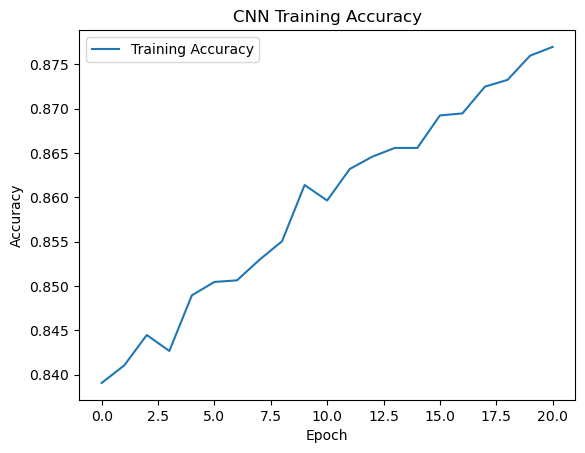

In [110]:
# Accuracy curve
plt.figure()
plt.plot(history.history["accuracy"], label="Training Accuracy")
# plot with validation data:
if "val_accuracy" in history.history:
    plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
plt.title("CNN Training Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

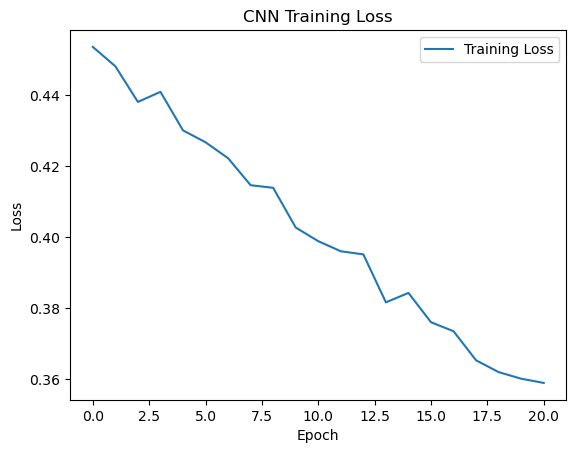

In [112]:
# Loss curve
plt.figure()
plt.plot(history.history["loss"], label="Training Loss")
# With validation data, this will also plot:
if "val_loss" in history.history:
    plt.plot(history.history["val_loss"], label="Validation Loss")
plt.title("CNN Training Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

## 7. Creating Confusion Matrix

In [79]:
# Define list of stations names

stations = {
0: 'BASEL',
1: 'BELGRADE',
2: 'BUDAPEST',
3: 'DEBILT',
4: 'DUSSELDORF',
5: 'HEATHROW',
6: 'KASSEL',
7: 'LJUBLJANA',
8: 'MAASTRICHT',
9: 'MADRID',
10: 'MUNCHENB',
11: 'OSLO',
12: 'SONNBLICK',
13: 'STOCKHOLM',
14: 'VALENTIA'
}

In [81]:
def confusion_matrix(y_true, y_pred, stations):
    # Check if y_true and y_pred are one-hot encoded or already class indices
    if y_true.ndim == 1:
        y_true_labels = y_true
    else:
        y_true_labels = np.argmax(y_true, axis=1)
    
    if y_pred.ndim == 1:
        y_pred_labels = y_pred
    else:
        y_pred_labels = np.argmax(y_pred, axis=1)
        
    # Map numeric labels to activity names
    y_true_series = pd.Series([stations[y] for y in y_true_labels])
    y_pred_series = pd.Series([stations[y] for y in y_pred_labels])
    
    return pd.crosstab(y_true_series, y_pred_series, rownames=['True'], colnames=['Pred'])

In [83]:
y_pred = model.predict(X_test)

180/180 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


In [87]:
# Evaluate

print(confusion_matrix(y_test, y_pred, stations))  

Pred        BASEL  BELGRADE  BUDAPEST  DEBILT  DUSSELDORF  HEATHROW  \
True                                                                  
BASEL        3057       363        55      17           0        56   
BELGRADE      217       709        31       4           0        20   
BUDAPEST       25        68        48      11           0         7   
DEBILT          7        12        11      17           1        18   
DUSSELDORF      8         0         2       1           0         9   
HEATHROW       16         3         2       2           0        15   
KASSEL          4         2         4       0           0         0   
LJUBLJANA      15         8         3       0           0         0   
MAASTRICHT      5         0         0       0           0         1   
MADRID        112        24         4       0           0         9   
MUNCHENB        5         2         0       0           0         0   
OSLO            1         1         0       0           0         1   
STOCKH

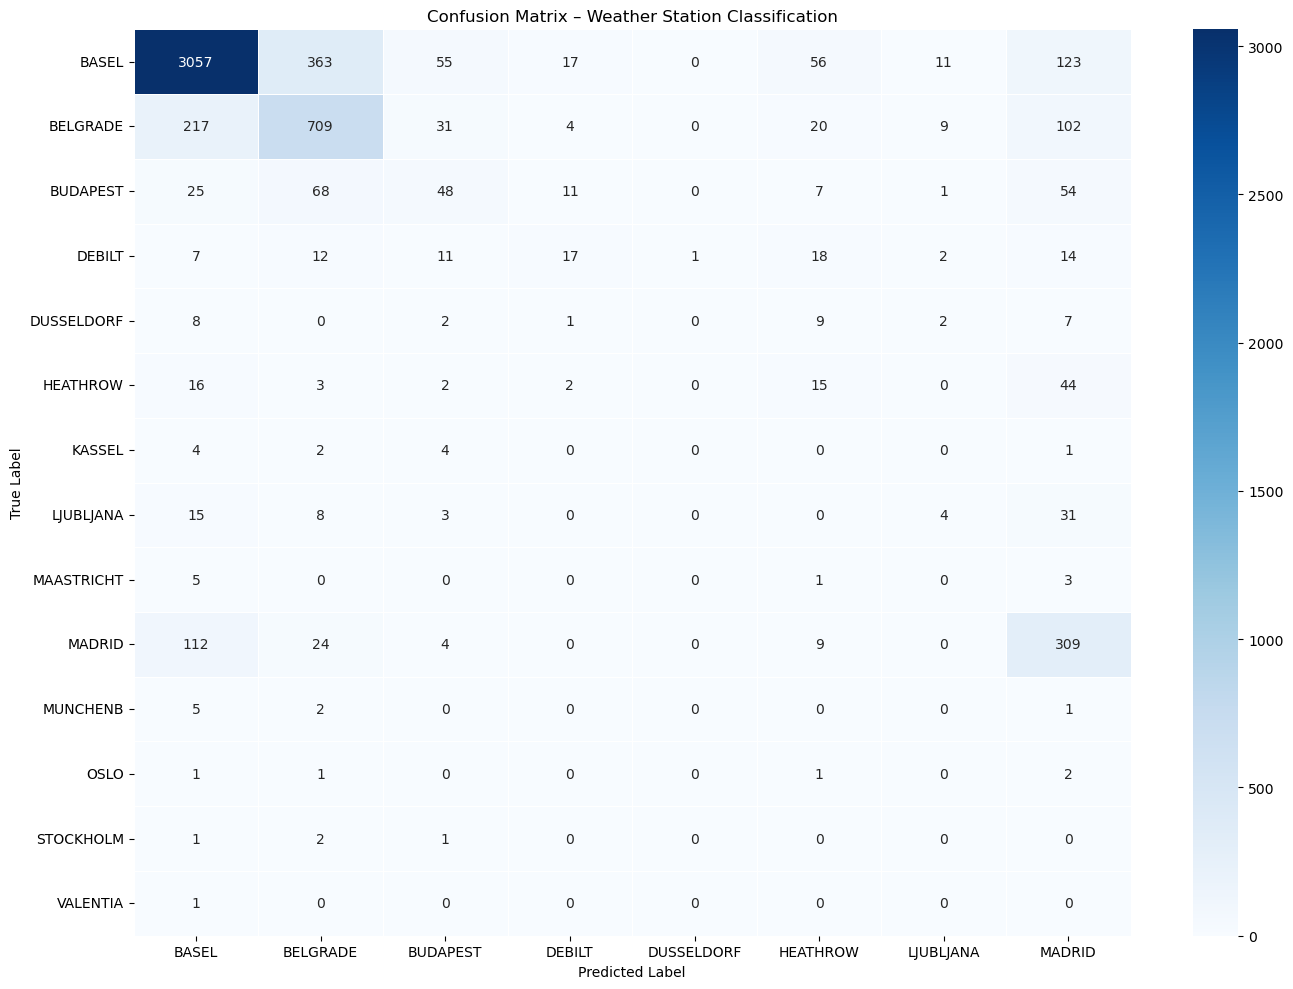

In [90]:
# Generate confusion matrix DataFrame
cm = confusion_matrix(y_test, y_pred, stations)

# Plot
plt.figure(figsize=(14, 10))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    linewidths=0.5
)

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix – Weather Station Classification")
plt.tight_layout()
plt.show()